In [23]:
import praw
import prawcore
import pandas as pd
import time
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # multiple output per jupyter notebook code block

# 用你的凭证初始化PRAW
reddit = praw.Reddit(client_id='9Ry3ASf3UTPWB4p4G_Tn4Q',
                     client_secret='FzGe_N27xm5NUa0hsYGtn2x4dv6rQA',
                     username='albusmaxgranger',
                     password='ma19950903',
                     user_agent='hh')


## Data Collection (Class, Attribute and Method)

### major datatype

In [13]:
def check(df):
    print(df.shape)
    print(pd.concat([df.isna().mean(), df.dtypes, df.count(), df.nunique()], axis=1).rename({0: 'miss_rate', 1: 'dtype', 2: 'count', 3: 'nunique'}, axis=1))
    return df  

In [39]:
# post
help(praw.models.reddit.submission)

Help on module praw.models.reddit.submission in praw.models.reddit:

NAME
    praw.models.reddit.submission - Provide the Submission class.

CLASSES
    builtins.object
        SubmissionFlair
    praw.models.listing.mixins.submission.SubmissionListingMixin(praw.models.base.PRAWBase)
        Submission(praw.models.listing.mixins.submission.SubmissionListingMixin, praw.models.reddit.mixins.UserContentMixin, praw.models.reddit.mixins.fullname.FullnameMixin, praw.models.reddit.base.RedditBase)
    praw.models.reddit.base.RedditBase(praw.models.base.PRAWBase)
        Submission(praw.models.listing.mixins.submission.SubmissionListingMixin, praw.models.reddit.mixins.UserContentMixin, praw.models.reddit.mixins.fullname.FullnameMixin, praw.models.reddit.base.RedditBase)
    praw.models.reddit.mixins.ThingModerationMixin(praw.models.reddit.mixins.modnote.ModNoteMixin)
        SubmissionModeration(praw.models.reddit.mixins.ThingModerationMixin, praw.models.reddit.mixins.modnote.ModNoteMixin)
   

In [38]:
# commentforrest
help(praw.models.reddit.submission.CommentForest)

Help on class CommentForest in module praw.models.comment_forest:

class CommentForest(builtins.object)
 |  CommentForest(submission: 'praw.models.Submission', comments: Optional[List[ForwardRef('praw.models.Comment')]] = None)
 |  
 |  A forest of comments starts with multiple top-level comments.
 |  
 |  Each of these comments can be a tree of replies.
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, index: int)
 |      Return the comment at position ``index`` in the list.
 |      
 |      This method is to be used like an array access, such as:
 |      
 |      .. code-block:: python
 |      
 |          first_comment = submission.comments[0]
 |      
 |      Alternatively, the presence of this method enables one to iterate over all top
 |      level comments, like so:
 |      
 |      .. code-block:: python
 |      
 |          for comment in submission.comments:
 |              print(comment.body)
 |  
 |  __init__(self, submission: 'praw.models.Submission', comments: Opt

In [49]:
help(praw.models.MoreComments)

Help on class MoreComments in module praw.models.reddit.more:

class MoreComments(praw.models.base.PRAWBase)
 |  MoreComments(reddit: 'praw.Reddit', _data: Dict[str, Any])
 |  
 |  A class indicating there are more comments.
 |  
 |  Method resolution order:
 |      MoreComments
 |      praw.models.base.PRAWBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other: Union[str, ForwardRef('MoreComments')]) -> bool
 |      Return ``True`` if these :class:`.MoreComments` instances are the same.
 |  
 |  __init__(self, reddit: 'praw.Reddit', _data: Dict[str, Any])
 |      Initialize a :class:`.MoreComments` instance.
 |  
 |  __lt__(self, other: 'MoreComments') -> bool
 |      Provide a sort order on the :class:`.MoreComments` object.
 |  
 |  __repr__(self) -> str
 |      Return an object initialization representation of the instance.
 |  
 |  comments(self, *, update: bool = True) -> List[ForwardRef('praw.models.Comment')]
 |      Fetch and return the comment

In [5]:
# comment
help(praw.models.reddit.comment)

Help on module praw.models.reddit.comment in praw.models.reddit:

NAME
    praw.models.reddit.comment - Provide the Comment class.

CLASSES
    praw.models.reddit.base.RedditBase(praw.models.base.PRAWBase)
        Comment(praw.models.reddit.mixins.inboxable.InboxableMixin, praw.models.reddit.mixins.UserContentMixin, praw.models.reddit.mixins.fullname.FullnameMixin, praw.models.reddit.base.RedditBase)
    praw.models.reddit.mixins.ThingModerationMixin(praw.models.reddit.mixins.modnote.ModNoteMixin)
        CommentModeration
    praw.models.reddit.mixins.UserContentMixin(praw.models.reddit.mixins.editable.EditableMixin, praw.models.reddit.mixins.gildable.GildableMixin, praw.models.reddit.mixins.inboxtoggleable.InboxToggleableMixin, praw.models.reddit.mixins.replyable.ReplyableMixin, praw.models.reddit.mixins.reportable.ReportableMixin, praw.models.reddit.mixins.savable.SavableMixin, praw.models.reddit.mixins.votable.VotableMixin)
        Comment(praw.models.reddit.mixins.inboxable.Inboxa

In [77]:
help(praw.reddit)

Help on module praw.reddit in praw:

NAME
    praw.reddit - Provide the Reddit class.

CLASSES
    builtins.object
        Reddit
    
    class Reddit(builtins.object)
     |  Reddit(site_name: Optional[str] = None, *, config_interpolation: Optional[str] = None, requestor_class: Optional[Type[prawcore.requestor.Requestor]] = None, requestor_kwargs: Optional[Dict[str, Any]] = None, token_manager: Optional[praw.util.token_manager.BaseTokenManager] = None, **config_settings: Union[str, bool, int, NoneType])
     |  
     |  The Reddit class provides convenient access to Reddit's API.
     |  
     |  Instances of this class are the gateway to interacting with Reddit's API through
     |  PRAW. The canonical way to obtain an instance of this class is via:
     |  
     |  .. code-block:: python
     |  
     |      import praw
     |  
     |      reddit = praw.Reddit(
     |          client_id="CLIENT_ID",
     |          client_secret="CLIENT_SECRET",
     |          password="PASSWORD"

In [24]:
help(prawcore.exceptions)

Help on module prawcore.exceptions in prawcore:

NAME
    prawcore.exceptions - Provide exception classes for the prawcore package.

CLASSES
    builtins.Exception(builtins.BaseException)
        PrawcoreException
            InvalidInvocation
            OAuthException
            RequestException
            ResponseException
                BadJSON
                BadRequest
                Conflict
                Forbidden
                InsufficientScope
                InvalidToken
                NotFound
                Redirect
                ServerError
                SpecialError
                TooLarge
                TooManyRequests
                URITooLong
                UnavailableForLegalReasons
    
    class BadJSON(ResponseException)
     |  BadJSON(response: 'Response') -> 'None'
     |  
     |  Indicate the response did not contain valid JSON.
     |  
     |  Method resolution order:
     |      BadJSON
     |      ResponseException
     |      PrawcoreEx

In [38]:
time.sleep(10)
print('hh')

hh


In [50]:
# 获取指定subreddit下的帖子及其评论
def get_submissions_search(subreddit_name, topic, limit=10):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    p_count = 0
    c_count = 0
    for post in subreddit.search(topic,limit=limit):
        p_count += 1
        post_info = {
            # fundamental info
            'id': post.id, # ID of the submission.
            'title': post.title, # The title of the submission.
            'author': post.author_flair_text, # The text content of the author's flair, or ``None`` if not flaired.
            # 'created_utc': post.created_utc, # Time the submission was created, represented in `Unix Time`_.
            'time': time.strftime('%Y-%m-%d', time.localtime(post.created_utc)),
            'selftext': post.selftext, # The submissions' selftext - an empty string if a link post.
            # score related
            'distinguished': post.distinguished, # Whether or not the submission is distinguished.
            'score': post.score, # The number of upvotes for the submission.
            'upvote_ratio': post.upvote_ratio, # The percentage of upvotes from all votes on the submission.            
            # next level
            'num_comments': post.num_comments, # The number of comments on the submission.
            'num_top_level_comments': post.comments.__len__(), # number of top-level comments in the forest.            
            'comments': [], # flattened list of all comments.
            # subreddit
            'subreddit_id': post.subreddit.id, # ID of the subreddit.
            'subreddit_name': post.subreddit.name, # Fullname of the subreddit.
            'subreddit_count': post.subreddit.subscribers # Count of subscribers.
        }
        while True:
            try:
                post.comments.replace_more(limit=None,threshold=0)
                break
            except:
                print("Handling replace_more exception")
                time.sleep(60)
        # post.comments.replace_more(limit=None,threshold=)  # Keep direct comments，drop comments of comments
        for comment in post.comments.list():  # Keep the top 20 comments of posts.
            c_count += 1
            print('p:',p_count,'c:',c_count,'avg c per p:',c_count/p_count)
            comment_info = {
                # fundamental info
                'cid': comment.id, # ID of the comment.
                # 'link_id': comment.link_id, # The submission ID that the comment belongs to.
                'clink_id_t': comment.link_id[:2],
                'clink_id_pid': comment.link_id[3:],
                # 'created_utc': comment.created_utc, # Time the comment was created, represented in `Unix Time`_.
                'ctime': time.strftime('%Y-%m-%d', time.localtime(comment.created_utc)),
                'cbody': comment.body, # The body of the comment, as Markdown.
                # score related                
                'cdistinguished': comment.distinguished,
                'cscore': comment.score, # The number of upvotes for the comment.
                # next level
                'cnum_replies': len(comment.replies.list()),
                # subreddit
                'csubreddit_id_t': comment.subreddit_id[:2], # The subreddit ID that the comment belongs to.
                'csubreddit_id_sid': comment.subreddit_id[3:] # The subreddit ID that the comment belongs to.
            }
            post_info['comments'].append(comment_info)
        posts.append(post_info)
    return posts


In [48]:
# 获取指定subreddit下的帖子及其评论
def get_submissions_new(subreddit_name, limit=10):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    p_count = 0
    c_count = 0
    for post in subreddit.new(limit=limit):
        p_count += 1
        post_info = {
            # fundamental info
            'id': post.id, # ID of the submission.
            'title': post.title, # The title of the submission.
            'author': post.author_flair_text, # The text content of the author's flair, or ``None`` if not flaired.
            # 'created_utc': post.created_utc, # Time the submission was created, represented in `Unix Time`_.
            'time': time.strftime('%Y-%m-%d', time.localtime(post.created_utc)),
            'selftext': post.selftext, # The submissions' selftext - an empty string if a link post.
            # score related
            'distinguished': post.distinguished, # Whether or not the submission is distinguished.
            'score': post.score, # The number of upvotes for the submission.
            'upvote_ratio': post.upvote_ratio, # The percentage of upvotes from all votes on the submission.            
            # next level
            'num_comments': post.num_comments, # The number of comments on the submission.
            'num_top_level_comments': post.comments.__len__(), # number of top-level comments in the forest.            
            'comments': [], # flattened list of all comments.
            # subreddit
            'subreddit_id': post.subreddit.id, # ID of the subreddit.
            'subreddit_name': post.subreddit.name, # Fullname of the subreddit.
            'subreddit_count': post.subreddit.subscribers # Count of subscribers.
        }
        while True:
            try:
                post.comments.replace_more(limit=None,threshold=0)
                break
            except:
                print("Handling replace_more exception")
                time.sleep(60)
        # post.comments.replace_more(limit=None,threshold=)  # Keep direct comments，drop comments of comments
        for comment in post.comments.list():  # Keep the top 20 comments of posts.
            c_count += 1
            print('p:',p_count,'c:',c_count,'avg c per p:',c_count/p_count)
            comment_info = {
                # fundamental info
                'cid': comment.id, # ID of the comment.
                # 'link_id': comment.link_id, # The submission ID that the comment belongs to.
                'clink_id_t': comment.link_id[:2],
                'clink_id_pid': comment.link_id[3:],
                # 'created_utc': comment.created_utc, # Time the comment was created, represented in `Unix Time`_.
                'ctime': time.strftime('%Y-%m-%d', time.localtime(comment.created_utc)),
                'cbody': comment.body, # The body of the comment, as Markdown.
                # score related                
                'cdistinguished': comment.distinguished,
                'cscore': comment.score, # The number of upvotes for the comment.
                # next level
                'cnum_replies': len(comment.replies.list()),
                # subreddit
                'csubreddit_id_t': comment.subreddit_id[:2], # The subreddit ID that the comment belongs to.
                'csubreddit_id_sid': comment.subreddit_id[3:] # The subreddit ID that the comment belongs to.
            }
            post_info['comments'].append(comment_info)
        posts.append(post_info)
    return posts


In [55]:
from collections import defaultdict
def posts2df(posts):
    post_list = []
    comment_list = []
    for post in posts: 
        p_loc = posts.index(post)
        post_comment = defaultdict(list)
        for comment in post['comments']:
            for k, v in comment.items():
                post_comment[k].append(v)
        post_ = defaultdict(list)
        for k, v in post.items():
            if k != 'comments':
                post_[k].append(v)
        post_list.append(pd.DataFrame(post_,index=[p_loc]))
        comment_list.append(pd.DataFrame(post_comment))

    df_submissions = pd.merge(pd.concat(post_list),pd.concat(comment_list),left_on='id',right_on='clink_id_pid',how='left')            
    # df_submissions['join_time'] = df_submissions['time'] + df_submissions['ctime']
    df_submissions['time'] = pd.to_datetime(df_submissions['time'])
    df_submissions['ctime'] = pd.to_datetime(df_submissions['ctime'])

    df_submissions = df_submissions[~(df_submissions['cdistinguished'] == 'moderator')]
    return df_submissions

In [51]:
# 使用示例
subreddit_name = 'NVDA_Stock'
posts_nvda = get_submissions_new(subreddit_name,limit = None)

p: 1 c: 1 avg c per p: 1.0
p: 1 c: 2 avg c per p: 2.0
p: 1 c: 3 avg c per p: 3.0
p: 1 c: 4 avg c per p: 4.0
p: 1 c: 5 avg c per p: 5.0
p: 1 c: 6 avg c per p: 6.0
p: 2 c: 7 avg c per p: 3.5
p: 2 c: 8 avg c per p: 4.0
p: 2 c: 9 avg c per p: 4.5
p: 2 c: 10 avg c per p: 5.0
p: 2 c: 11 avg c per p: 5.5
p: 3 c: 12 avg c per p: 4.0
p: 3 c: 13 avg c per p: 4.333333333333333
p: 3 c: 14 avg c per p: 4.666666666666667
p: 3 c: 15 avg c per p: 5.0
p: 4 c: 16 avg c per p: 4.0
p: 4 c: 17 avg c per p: 4.25
p: 4 c: 18 avg c per p: 4.5
p: 6 c: 19 avg c per p: 3.1666666666666665
p: 6 c: 20 avg c per p: 3.3333333333333335
p: 6 c: 21 avg c per p: 3.5
p: 6 c: 22 avg c per p: 3.6666666666666665
p: 6 c: 23 avg c per p: 3.8333333333333335
p: 6 c: 24 avg c per p: 4.0
p: 6 c: 25 avg c per p: 4.166666666666667
p: 6 c: 26 avg c per p: 4.333333333333333
p: 6 c: 27 avg c per p: 4.5
p: 6 c: 28 avg c per p: 4.666666666666667
p: 6 c: 29 avg c per p: 4.833333333333333
p: 6 c: 30 avg c per p: 5.0
p: 6 c: 31 avg c per p: 

p: 18 c: 225 avg c per p: 12.5
p: 18 c: 226 avg c per p: 12.555555555555555
p: 18 c: 227 avg c per p: 12.61111111111111
p: 18 c: 228 avg c per p: 12.666666666666666
p: 18 c: 229 avg c per p: 12.722222222222221
p: 18 c: 230 avg c per p: 12.777777777777779
p: 18 c: 231 avg c per p: 12.833333333333334
p: 18 c: 232 avg c per p: 12.88888888888889
p: 18 c: 233 avg c per p: 12.944444444444445
p: 18 c: 234 avg c per p: 13.0
p: 18 c: 235 avg c per p: 13.055555555555555
p: 18 c: 236 avg c per p: 13.11111111111111
p: 18 c: 237 avg c per p: 13.166666666666666
p: 18 c: 238 avg c per p: 13.222222222222221
p: 18 c: 239 avg c per p: 13.277777777777779
p: 18 c: 240 avg c per p: 13.333333333333334
p: 18 c: 241 avg c per p: 13.38888888888889
p: 18 c: 242 avg c per p: 13.444444444444445
p: 18 c: 243 avg c per p: 13.5
p: 18 c: 244 avg c per p: 13.555555555555555
p: 18 c: 245 avg c per p: 13.61111111111111
p: 18 c: 246 avg c per p: 13.666666666666666
p: 18 c: 247 avg c per p: 13.722222222222221
p: 18 c: 248

p: 20 c: 418 avg c per p: 20.9
p: 20 c: 419 avg c per p: 20.95
p: 20 c: 420 avg c per p: 21.0
p: 20 c: 421 avg c per p: 21.05
p: 20 c: 422 avg c per p: 21.1
p: 20 c: 423 avg c per p: 21.15
p: 20 c: 424 avg c per p: 21.2
p: 20 c: 425 avg c per p: 21.25
p: 20 c: 426 avg c per p: 21.3
p: 20 c: 427 avg c per p: 21.35
p: 20 c: 428 avg c per p: 21.4
p: 20 c: 429 avg c per p: 21.45
p: 20 c: 430 avg c per p: 21.5
p: 20 c: 431 avg c per p: 21.55
p: 20 c: 432 avg c per p: 21.6
p: 20 c: 433 avg c per p: 21.65
p: 20 c: 434 avg c per p: 21.7
p: 20 c: 435 avg c per p: 21.75
p: 20 c: 436 avg c per p: 21.8
p: 20 c: 437 avg c per p: 21.85
p: 21 c: 438 avg c per p: 20.857142857142858
p: 21 c: 439 avg c per p: 20.904761904761905
p: 21 c: 440 avg c per p: 20.952380952380953
p: 21 c: 441 avg c per p: 21.0
p: 21 c: 442 avg c per p: 21.047619047619047
p: 21 c: 443 avg c per p: 21.095238095238095
p: 21 c: 444 avg c per p: 21.142857142857142
p: 21 c: 445 avg c per p: 21.19047619047619
p: 21 c: 446 avg c per p:

p: 29 c: 624 avg c per p: 21.517241379310345
p: 30 c: 625 avg c per p: 20.833333333333332
p: 30 c: 626 avg c per p: 20.866666666666667
p: 30 c: 627 avg c per p: 20.9
p: 30 c: 628 avg c per p: 20.933333333333334
p: 30 c: 629 avg c per p: 20.966666666666665
p: 30 c: 630 avg c per p: 21.0
p: 30 c: 631 avg c per p: 21.033333333333335
p: 30 c: 632 avg c per p: 21.066666666666666
p: 30 c: 633 avg c per p: 21.1
p: 30 c: 634 avg c per p: 21.133333333333333
p: 30 c: 635 avg c per p: 21.166666666666668
p: 30 c: 636 avg c per p: 21.2
p: 30 c: 637 avg c per p: 21.233333333333334
p: 30 c: 638 avg c per p: 21.266666666666666
p: 30 c: 639 avg c per p: 21.3
p: 30 c: 640 avg c per p: 21.333333333333332
p: 30 c: 641 avg c per p: 21.366666666666667
p: 30 c: 642 avg c per p: 21.4
p: 30 c: 643 avg c per p: 21.433333333333334
p: 30 c: 644 avg c per p: 21.466666666666665
p: 30 c: 645 avg c per p: 21.5
p: 30 c: 646 avg c per p: 21.533333333333335
p: 30 c: 647 avg c per p: 21.566666666666666
p: 30 c: 648 avg c

p: 36 c: 879 avg c per p: 24.416666666666668
p: 37 c: 880 avg c per p: 23.783783783783782
p: 37 c: 881 avg c per p: 23.81081081081081
p: 37 c: 882 avg c per p: 23.83783783783784
p: 37 c: 883 avg c per p: 23.864864864864863
p: 37 c: 884 avg c per p: 23.89189189189189
p: 37 c: 885 avg c per p: 23.91891891891892
p: 37 c: 886 avg c per p: 23.945945945945947
p: 37 c: 887 avg c per p: 23.972972972972972
p: 37 c: 888 avg c per p: 24.0
p: 37 c: 889 avg c per p: 24.027027027027028
p: 37 c: 890 avg c per p: 24.054054054054053
p: 37 c: 891 avg c per p: 24.08108108108108
p: 37 c: 892 avg c per p: 24.10810810810811
p: 37 c: 893 avg c per p: 24.135135135135137
p: 37 c: 894 avg c per p: 24.16216216216216
p: 37 c: 895 avg c per p: 24.18918918918919
p: 37 c: 896 avg c per p: 24.216216216216218
p: 37 c: 897 avg c per p: 24.243243243243242
p: 37 c: 898 avg c per p: 24.27027027027027
p: 37 c: 899 avg c per p: 24.2972972972973
p: 37 c: 900 avg c per p: 24.324324324324323
p: 37 c: 901 avg c per p: 24.351351

p: 40 c: 1102 avg c per p: 27.55
p: 40 c: 1103 avg c per p: 27.575
p: 40 c: 1104 avg c per p: 27.6
p: 40 c: 1105 avg c per p: 27.625
p: 40 c: 1106 avg c per p: 27.65
p: 40 c: 1107 avg c per p: 27.675
p: 40 c: 1108 avg c per p: 27.7
p: 40 c: 1109 avg c per p: 27.725
p: 40 c: 1110 avg c per p: 27.75
p: 40 c: 1111 avg c per p: 27.775
p: 40 c: 1112 avg c per p: 27.8
p: 40 c: 1113 avg c per p: 27.825
p: 40 c: 1114 avg c per p: 27.85
p: 40 c: 1115 avg c per p: 27.875
p: 40 c: 1116 avg c per p: 27.9
p: 40 c: 1117 avg c per p: 27.925
p: 40 c: 1118 avg c per p: 27.95
p: 40 c: 1119 avg c per p: 27.975
p: 40 c: 1120 avg c per p: 28.0
p: 40 c: 1121 avg c per p: 28.025
p: 40 c: 1122 avg c per p: 28.05
p: 40 c: 1123 avg c per p: 28.075
p: 40 c: 1124 avg c per p: 28.1
p: 40 c: 1125 avg c per p: 28.125
p: 40 c: 1126 avg c per p: 28.15
p: 40 c: 1127 avg c per p: 28.175
p: 40 c: 1128 avg c per p: 28.2
p: 40 c: 1129 avg c per p: 28.225
p: 40 c: 1130 avg c per p: 28.25
p: 40 c: 1131 avg c per p: 28.275
p:

p: 48 c: 1346 avg c per p: 28.041666666666668
p: 48 c: 1347 avg c per p: 28.0625
p: 48 c: 1348 avg c per p: 28.083333333333332
p: 48 c: 1349 avg c per p: 28.104166666666668
p: 48 c: 1350 avg c per p: 28.125
p: 48 c: 1351 avg c per p: 28.145833333333332
p: 48 c: 1352 avg c per p: 28.166666666666668
p: 48 c: 1353 avg c per p: 28.1875
p: 48 c: 1354 avg c per p: 28.208333333333332
p: 48 c: 1355 avg c per p: 28.229166666666668
p: 48 c: 1356 avg c per p: 28.25
p: 48 c: 1357 avg c per p: 28.270833333333332
p: 48 c: 1358 avg c per p: 28.291666666666668
p: 48 c: 1359 avg c per p: 28.3125
p: 48 c: 1360 avg c per p: 28.333333333333332
p: 48 c: 1361 avg c per p: 28.354166666666668
p: 48 c: 1362 avg c per p: 28.375
p: 48 c: 1363 avg c per p: 28.395833333333332
p: 48 c: 1364 avg c per p: 28.416666666666668
p: 48 c: 1365 avg c per p: 28.4375
p: 48 c: 1366 avg c per p: 28.458333333333332
p: 48 c: 1367 avg c per p: 28.479166666666668
p: 48 c: 1368 avg c per p: 28.5
p: 48 c: 1369 avg c per p: 28.5208333

p: 57 c: 1568 avg c per p: 27.50877192982456
p: 57 c: 1569 avg c per p: 27.526315789473685
p: 57 c: 1570 avg c per p: 27.54385964912281
p: 57 c: 1571 avg c per p: 27.56140350877193
p: 57 c: 1572 avg c per p: 27.57894736842105
p: 57 c: 1573 avg c per p: 27.596491228070175
p: 57 c: 1574 avg c per p: 27.614035087719298
p: 57 c: 1575 avg c per p: 27.63157894736842
p: 57 c: 1576 avg c per p: 27.649122807017545
p: 57 c: 1577 avg c per p: 27.666666666666668
p: 57 c: 1578 avg c per p: 27.68421052631579
p: 57 c: 1579 avg c per p: 27.70175438596491
p: 57 c: 1580 avg c per p: 27.719298245614034
p: 57 c: 1581 avg c per p: 27.736842105263158
p: 57 c: 1582 avg c per p: 27.75438596491228
p: 57 c: 1583 avg c per p: 27.771929824561404
p: 57 c: 1584 avg c per p: 27.789473684210527
p: 57 c: 1585 avg c per p: 27.80701754385965
p: 57 c: 1586 avg c per p: 27.82456140350877
p: 57 c: 1587 avg c per p: 27.842105263157894
p: 58 c: 1588 avg c per p: 27.379310344827587
p: 58 c: 1589 avg c per p: 27.39655172413793

p: 65 c: 1778 avg c per p: 27.353846153846153
p: 65 c: 1779 avg c per p: 27.369230769230768
p: 65 c: 1780 avg c per p: 27.384615384615383
p: 65 c: 1781 avg c per p: 27.4
p: 65 c: 1782 avg c per p: 27.415384615384614
p: 65 c: 1783 avg c per p: 27.43076923076923
p: 65 c: 1784 avg c per p: 27.446153846153845
p: 65 c: 1785 avg c per p: 27.46153846153846
p: 65 c: 1786 avg c per p: 27.476923076923075
p: 65 c: 1787 avg c per p: 27.49230769230769
p: 65 c: 1788 avg c per p: 27.50769230769231
p: 65 c: 1789 avg c per p: 27.523076923076925
p: 65 c: 1790 avg c per p: 27.53846153846154
p: 65 c: 1791 avg c per p: 27.553846153846155
p: 65 c: 1792 avg c per p: 27.56923076923077
p: 65 c: 1793 avg c per p: 27.584615384615386
p: 65 c: 1794 avg c per p: 27.6
p: 65 c: 1795 avg c per p: 27.615384615384617
p: 65 c: 1796 avg c per p: 27.630769230769232
p: 65 c: 1797 avg c per p: 27.646153846153847
p: 65 c: 1798 avg c per p: 27.661538461538463
p: 65 c: 1799 avg c per p: 27.676923076923078
p: 65 c: 1800 avg c pe

p: 78 c: 2031 avg c per p: 26.03846153846154
p: 78 c: 2032 avg c per p: 26.05128205128205
p: 78 c: 2033 avg c per p: 26.064102564102566
p: 78 c: 2034 avg c per p: 26.076923076923077
p: 78 c: 2035 avg c per p: 26.08974358974359
p: 78 c: 2036 avg c per p: 26.102564102564102
p: 78 c: 2037 avg c per p: 26.115384615384617
p: 78 c: 2038 avg c per p: 26.128205128205128
p: 78 c: 2039 avg c per p: 26.141025641025642
p: 78 c: 2040 avg c per p: 26.153846153846153
p: 78 c: 2041 avg c per p: 26.166666666666668
p: 78 c: 2042 avg c per p: 26.17948717948718
p: 78 c: 2043 avg c per p: 26.192307692307693
p: 78 c: 2044 avg c per p: 26.205128205128204
p: 78 c: 2045 avg c per p: 26.21794871794872
p: 78 c: 2046 avg c per p: 26.23076923076923
p: 78 c: 2047 avg c per p: 26.243589743589745
p: 78 c: 2048 avg c per p: 26.256410256410255
p: 78 c: 2049 avg c per p: 26.26923076923077
p: 79 c: 2050 avg c per p: 25.949367088607595
p: 79 c: 2051 avg c per p: 25.962025316455698
p: 79 c: 2052 avg c per p: 25.97468354430

p: 88 c: 2233 avg c per p: 25.375
p: 88 c: 2234 avg c per p: 25.386363636363637
p: 88 c: 2235 avg c per p: 25.397727272727273
p: 88 c: 2236 avg c per p: 25.40909090909091
p: 88 c: 2237 avg c per p: 25.420454545454547
p: 88 c: 2238 avg c per p: 25.431818181818183
p: 88 c: 2239 avg c per p: 25.443181818181817
p: 89 c: 2240 avg c per p: 25.168539325842698
p: 89 c: 2241 avg c per p: 25.179775280898877
p: 89 c: 2242 avg c per p: 25.191011235955056
p: 89 c: 2243 avg c per p: 25.202247191011235
p: 89 c: 2244 avg c per p: 25.213483146067414
p: 89 c: 2245 avg c per p: 25.224719101123597
p: 89 c: 2246 avg c per p: 25.235955056179776
p: 89 c: 2247 avg c per p: 25.247191011235955
p: 89 c: 2248 avg c per p: 25.258426966292134
p: 89 c: 2249 avg c per p: 25.269662921348313
p: 89 c: 2250 avg c per p: 25.280898876404493
p: 89 c: 2251 avg c per p: 25.292134831460675
p: 89 c: 2252 avg c per p: 25.303370786516854
p: 89 c: 2253 avg c per p: 25.314606741573034
p: 89 c: 2254 avg c per p: 25.325842696629213
p

p: 95 c: 2421 avg c per p: 25.48421052631579
p: 95 c: 2422 avg c per p: 25.49473684210526
p: 95 c: 2423 avg c per p: 25.50526315789474
p: 95 c: 2424 avg c per p: 25.51578947368421
p: 95 c: 2425 avg c per p: 25.526315789473685
p: 95 c: 2426 avg c per p: 25.53684210526316
p: 95 c: 2427 avg c per p: 25.54736842105263
p: 95 c: 2428 avg c per p: 25.557894736842105
p: 95 c: 2429 avg c per p: 25.568421052631578
p: 95 c: 2430 avg c per p: 25.57894736842105
p: 95 c: 2431 avg c per p: 25.589473684210525
p: 95 c: 2432 avg c per p: 25.6
p: 95 c: 2433 avg c per p: 25.610526315789475
p: 95 c: 2434 avg c per p: 25.621052631578948
p: 95 c: 2435 avg c per p: 25.63157894736842
p: 95 c: 2436 avg c per p: 25.642105263157895
p: 95 c: 2437 avg c per p: 25.652631578947368
p: 95 c: 2438 avg c per p: 25.66315789473684
p: 95 c: 2439 avg c per p: 25.673684210526314
p: 95 c: 2440 avg c per p: 25.68421052631579
p: 95 c: 2441 avg c per p: 25.694736842105264
p: 95 c: 2442 avg c per p: 25.705263157894738
p: 95 c: 244

p: 103 c: 2610 avg c per p: 25.339805825242717
p: 103 c: 2611 avg c per p: 25.349514563106798
p: 103 c: 2612 avg c per p: 25.359223300970875
p: 103 c: 2613 avg c per p: 25.368932038834952
p: 103 c: 2614 avg c per p: 25.37864077669903
p: 104 c: 2615 avg c per p: 25.14423076923077
p: 104 c: 2616 avg c per p: 25.153846153846153
p: 104 c: 2617 avg c per p: 25.16346153846154
p: 104 c: 2618 avg c per p: 25.173076923076923
p: 104 c: 2619 avg c per p: 25.182692307692307
p: 104 c: 2620 avg c per p: 25.192307692307693
p: 104 c: 2621 avg c per p: 25.201923076923077
p: 104 c: 2622 avg c per p: 25.21153846153846
p: 104 c: 2623 avg c per p: 25.221153846153847
p: 104 c: 2624 avg c per p: 25.23076923076923
p: 104 c: 2625 avg c per p: 25.240384615384617
p: 104 c: 2626 avg c per p: 25.25
p: 104 c: 2627 avg c per p: 25.259615384615383
p: 104 c: 2628 avg c per p: 25.26923076923077
p: 104 c: 2629 avg c per p: 25.278846153846153
p: 104 c: 2630 avg c per p: 25.28846153846154
p: 104 c: 2631 avg c per p: 25.29

p: 113 c: 2799 avg c per p: 24.76991150442478
p: 113 c: 2800 avg c per p: 24.778761061946902
p: 114 c: 2801 avg c per p: 24.57017543859649
p: 114 c: 2802 avg c per p: 24.57894736842105
p: 115 c: 2803 avg c per p: 24.37391304347826
p: 115 c: 2804 avg c per p: 24.382608695652173
p: 115 c: 2805 avg c per p: 24.391304347826086
p: 115 c: 2806 avg c per p: 24.4
p: 115 c: 2807 avg c per p: 24.408695652173915
p: 115 c: 2808 avg c per p: 24.417391304347827
p: 115 c: 2809 avg c per p: 24.42608695652174
p: 115 c: 2810 avg c per p: 24.434782608695652
p: 115 c: 2811 avg c per p: 24.443478260869565
p: 116 c: 2812 avg c per p: 24.24137931034483
p: 116 c: 2813 avg c per p: 24.25
p: 116 c: 2814 avg c per p: 24.25862068965517
p: 116 c: 2815 avg c per p: 24.267241379310345
p: 116 c: 2816 avg c per p: 24.275862068965516
p: 116 c: 2817 avg c per p: 24.28448275862069
p: 116 c: 2818 avg c per p: 24.29310344827586
p: 116 c: 2819 avg c per p: 24.301724137931036
p: 116 c: 2820 avg c per p: 24.310344827586206
p:

p: 126 c: 3046 avg c per p: 24.174603174603174
p: 126 c: 3047 avg c per p: 24.182539682539684
p: 126 c: 3048 avg c per p: 24.19047619047619
p: 126 c: 3049 avg c per p: 24.1984126984127
p: 126 c: 3050 avg c per p: 24.206349206349206
p: 126 c: 3051 avg c per p: 24.214285714285715
p: 126 c: 3052 avg c per p: 24.22222222222222
p: 126 c: 3053 avg c per p: 24.23015873015873
p: 126 c: 3054 avg c per p: 24.238095238095237
p: 126 c: 3055 avg c per p: 24.246031746031747
p: 126 c: 3056 avg c per p: 24.253968253968253
p: 126 c: 3057 avg c per p: 24.261904761904763
p: 126 c: 3058 avg c per p: 24.26984126984127
p: 126 c: 3059 avg c per p: 24.27777777777778
p: 126 c: 3060 avg c per p: 24.285714285714285
p: 126 c: 3061 avg c per p: 24.293650793650794
p: 126 c: 3062 avg c per p: 24.3015873015873
p: 126 c: 3063 avg c per p: 24.30952380952381
p: 126 c: 3064 avg c per p: 24.317460317460316
p: 126 c: 3065 avg c per p: 24.325396825396826
p: 126 c: 3066 avg c per p: 24.333333333333332
p: 126 c: 3067 avg c pe

p: 134 c: 3259 avg c per p: 24.32089552238806
p: 134 c: 3260 avg c per p: 24.328358208955223
p: 134 c: 3261 avg c per p: 24.33582089552239
p: 134 c: 3262 avg c per p: 24.34328358208955
p: 134 c: 3263 avg c per p: 24.350746268656717
p: 134 c: 3264 avg c per p: 24.35820895522388
p: 134 c: 3265 avg c per p: 24.365671641791046
p: 134 c: 3266 avg c per p: 24.37313432835821
p: 134 c: 3267 avg c per p: 24.380597014925375
p: 134 c: 3268 avg c per p: 24.388059701492537
p: 134 c: 3269 avg c per p: 24.395522388059703
p: 134 c: 3270 avg c per p: 24.402985074626866
p: 134 c: 3271 avg c per p: 24.41044776119403
p: 134 c: 3272 avg c per p: 24.417910447761194
p: 134 c: 3273 avg c per p: 24.425373134328357
p: 134 c: 3274 avg c per p: 24.432835820895523
p: 134 c: 3275 avg c per p: 24.440298507462686
p: 134 c: 3276 avg c per p: 24.44776119402985
p: 134 c: 3277 avg c per p: 24.455223880597014
p: 134 c: 3278 avg c per p: 24.46268656716418
p: 134 c: 3279 avg c per p: 24.470149253731343
p: 134 c: 3280 avg c 

p: 147 c: 3442 avg c per p: 23.41496598639456
p: 147 c: 3443 avg c per p: 23.421768707482993
p: 147 c: 3444 avg c per p: 23.428571428571427
p: 147 c: 3445 avg c per p: 23.435374149659864
p: 147 c: 3446 avg c per p: 23.4421768707483
p: 147 c: 3447 avg c per p: 23.448979591836736
p: 147 c: 3448 avg c per p: 23.45578231292517
p: 147 c: 3449 avg c per p: 23.462585034013607
p: 147 c: 3450 avg c per p: 23.46938775510204
p: 147 c: 3451 avg c per p: 23.476190476190474
p: 147 c: 3452 avg c per p: 23.482993197278912
p: 148 c: 3453 avg c per p: 23.33108108108108
p: 148 c: 3454 avg c per p: 23.33783783783784
p: 148 c: 3455 avg c per p: 23.344594594594593
p: 148 c: 3456 avg c per p: 23.35135135135135
p: 148 c: 3457 avg c per p: 23.35810810810811
p: 148 c: 3458 avg c per p: 23.364864864864863
p: 148 c: 3459 avg c per p: 23.37162162162162
p: 148 c: 3460 avg c per p: 23.37837837837838
p: 148 c: 3461 avg c per p: 23.385135135135137
p: 148 c: 3462 avg c per p: 23.39189189189189
p: 148 c: 3463 avg c per 

p: 156 c: 3622 avg c per p: 23.21794871794872
p: 156 c: 3623 avg c per p: 23.224358974358974
p: 156 c: 3624 avg c per p: 23.23076923076923
p: 156 c: 3625 avg c per p: 23.237179487179485
p: 157 c: 3626 avg c per p: 23.095541401273884
p: 157 c: 3627 avg c per p: 23.101910828025478
p: 157 c: 3628 avg c per p: 23.10828025477707
p: 157 c: 3629 avg c per p: 23.11464968152866
p: 157 c: 3630 avg c per p: 23.121019108280255
p: 157 c: 3631 avg c per p: 23.127388535031848
p: 157 c: 3632 avg c per p: 23.133757961783438
p: 157 c: 3633 avg c per p: 23.14012738853503
p: 157 c: 3634 avg c per p: 23.146496815286625
p: 157 c: 3635 avg c per p: 23.15286624203822
p: 158 c: 3636 avg c per p: 23.0126582278481
p: 158 c: 3637 avg c per p: 23.018987341772153
p: 158 c: 3638 avg c per p: 23.025316455696203
p: 158 c: 3639 avg c per p: 23.031645569620252
p: 158 c: 3640 avg c per p: 23.037974683544302
p: 158 c: 3641 avg c per p: 23.044303797468356
p: 158 c: 3642 avg c per p: 23.050632911392405
p: 158 c: 3643 avg c 

p: 166 c: 3818 avg c per p: 23.0
p: 166 c: 3819 avg c per p: 23.00602409638554
p: 166 c: 3820 avg c per p: 23.012048192771083
p: 166 c: 3821 avg c per p: 23.018072289156628
p: 166 c: 3822 avg c per p: 23.02409638554217
p: 166 c: 3823 avg c per p: 23.03012048192771
p: 166 c: 3824 avg c per p: 23.03614457831325
p: 166 c: 3825 avg c per p: 23.042168674698797
p: 166 c: 3826 avg c per p: 23.048192771084338
p: 166 c: 3827 avg c per p: 23.05421686746988
p: 166 c: 3828 avg c per p: 23.06024096385542
p: 166 c: 3829 avg c per p: 23.066265060240966
p: 166 c: 3830 avg c per p: 23.072289156626507
p: 166 c: 3831 avg c per p: 23.07831325301205
p: 166 c: 3832 avg c per p: 23.08433734939759
p: 166 c: 3833 avg c per p: 23.09036144578313
p: 166 c: 3834 avg c per p: 23.096385542168676
p: 166 c: 3835 avg c per p: 23.102409638554217
p: 166 c: 3836 avg c per p: 23.10843373493976
p: 166 c: 3837 avg c per p: 23.1144578313253
p: 166 c: 3838 avg c per p: 23.120481927710845
p: 166 c: 3839 avg c per p: 23.12650602

p: 180 c: 3998 avg c per p: 22.211111111111112
p: 180 c: 3999 avg c per p: 22.216666666666665
p: 180 c: 4000 avg c per p: 22.22222222222222
p: 180 c: 4001 avg c per p: 22.227777777777778
p: 180 c: 4002 avg c per p: 22.233333333333334
p: 180 c: 4003 avg c per p: 22.238888888888887
p: 180 c: 4004 avg c per p: 22.244444444444444
p: 180 c: 4005 avg c per p: 22.25
p: 180 c: 4006 avg c per p: 22.255555555555556
p: 181 c: 4007 avg c per p: 22.138121546961326
p: 181 c: 4008 avg c per p: 22.14364640883978
p: 181 c: 4009 avg c per p: 22.14917127071823
p: 181 c: 4010 avg c per p: 22.154696132596683
p: 181 c: 4011 avg c per p: 22.16022099447514
p: 181 c: 4012 avg c per p: 22.165745856353592
p: 181 c: 4013 avg c per p: 22.171270718232044
p: 181 c: 4014 avg c per p: 22.176795580110497
p: 181 c: 4015 avg c per p: 22.18232044198895
p: 182 c: 4016 avg c per p: 22.065934065934066
p: 182 c: 4017 avg c per p: 22.071428571428573
p: 182 c: 4018 avg c per p: 22.076923076923077
p: 182 c: 4019 avg c per p: 22.

p: 196 c: 4195 avg c per p: 21.403061224489797
p: 196 c: 4196 avg c per p: 21.408163265306122
p: 196 c: 4197 avg c per p: 21.413265306122447
p: 196 c: 4198 avg c per p: 21.418367346938776
p: 196 c: 4199 avg c per p: 21.4234693877551
p: 196 c: 4200 avg c per p: 21.428571428571427
p: 196 c: 4201 avg c per p: 21.433673469387756
p: 196 c: 4202 avg c per p: 21.43877551020408
p: 196 c: 4203 avg c per p: 21.443877551020407
p: 196 c: 4204 avg c per p: 21.448979591836736
p: 196 c: 4205 avg c per p: 21.45408163265306
p: 196 c: 4206 avg c per p: 21.459183673469386
p: 196 c: 4207 avg c per p: 21.464285714285715
p: 196 c: 4208 avg c per p: 21.46938775510204
p: 196 c: 4209 avg c per p: 21.474489795918366
p: 196 c: 4210 avg c per p: 21.479591836734695
p: 196 c: 4211 avg c per p: 21.48469387755102
p: 196 c: 4212 avg c per p: 21.489795918367346
p: 196 c: 4213 avg c per p: 21.494897959183675
p: 196 c: 4214 avg c per p: 21.5
p: 196 c: 4215 avg c per p: 21.505102040816325
p: 196 c: 4216 avg c per p: 21.51

p: 206 c: 4411 avg c per p: 21.4126213592233
p: 206 c: 4412 avg c per p: 21.41747572815534
p: 206 c: 4413 avg c per p: 21.42233009708738
p: 206 c: 4414 avg c per p: 21.42718446601942
p: 206 c: 4415 avg c per p: 21.432038834951456
p: 206 c: 4416 avg c per p: 21.436893203883496
p: 206 c: 4417 avg c per p: 21.441747572815533
p: 206 c: 4418 avg c per p: 21.446601941747574
p: 206 c: 4419 avg c per p: 21.45145631067961
p: 206 c: 4420 avg c per p: 21.45631067961165
p: 206 c: 4421 avg c per p: 21.461165048543688
p: 206 c: 4422 avg c per p: 21.466019417475728
p: 206 c: 4423 avg c per p: 21.47087378640777
p: 206 c: 4424 avg c per p: 21.475728155339805
p: 206 c: 4425 avg c per p: 21.480582524271846
p: 206 c: 4426 avg c per p: 21.485436893203882
p: 206 c: 4427 avg c per p: 21.490291262135923
p: 206 c: 4428 avg c per p: 21.49514563106796
p: 206 c: 4429 avg c per p: 21.5
p: 206 c: 4430 avg c per p: 21.50485436893204
p: 206 c: 4431 avg c per p: 21.509708737864077
p: 206 c: 4432 avg c per p: 21.514563

p: 215 c: 4588 avg c per p: 21.33953488372093
p: 215 c: 4589 avg c per p: 21.344186046511627
p: 215 c: 4590 avg c per p: 21.348837209302324
p: 215 c: 4591 avg c per p: 21.35348837209302
p: 215 c: 4592 avg c per p: 21.358139534883723
p: 215 c: 4593 avg c per p: 21.36279069767442
p: 215 c: 4594 avg c per p: 21.367441860465117
p: 215 c: 4595 avg c per p: 21.372093023255815
p: 216 c: 4596 avg c per p: 21.27777777777778
p: 216 c: 4597 avg c per p: 21.28240740740741
p: 216 c: 4598 avg c per p: 21.287037037037038
p: 216 c: 4599 avg c per p: 21.291666666666668
p: 216 c: 4600 avg c per p: 21.296296296296298
p: 216 c: 4601 avg c per p: 21.300925925925927
p: 216 c: 4602 avg c per p: 21.305555555555557
p: 216 c: 4603 avg c per p: 21.310185185185187
p: 216 c: 4604 avg c per p: 21.314814814814813
p: 216 c: 4605 avg c per p: 21.319444444444443
p: 216 c: 4606 avg c per p: 21.324074074074073
p: 216 c: 4607 avg c per p: 21.328703703703702
p: 216 c: 4608 avg c per p: 21.333333333333332
p: 216 c: 4609 avg

p: 225 c: 4773 avg c per p: 21.213333333333335
p: 225 c: 4774 avg c per p: 21.217777777777776
p: 225 c: 4775 avg c per p: 21.22222222222222
p: 225 c: 4776 avg c per p: 21.226666666666667
p: 225 c: 4777 avg c per p: 21.23111111111111
p: 225 c: 4778 avg c per p: 21.235555555555557
p: 225 c: 4779 avg c per p: 21.24
p: 225 c: 4780 avg c per p: 21.244444444444444
p: 225 c: 4781 avg c per p: 21.24888888888889
p: 226 c: 4782 avg c per p: 21.15929203539823
p: 226 c: 4783 avg c per p: 21.163716814159294
p: 226 c: 4784 avg c per p: 21.168141592920353
p: 226 c: 4785 avg c per p: 21.172566371681416
p: 226 c: 4786 avg c per p: 21.17699115044248
p: 226 c: 4787 avg c per p: 21.18141592920354
p: 226 c: 4788 avg c per p: 21.1858407079646
p: 226 c: 4789 avg c per p: 21.190265486725664
p: 226 c: 4790 avg c per p: 21.194690265486727
p: 226 c: 4791 avg c per p: 21.199115044247787
p: 226 c: 4792 avg c per p: 21.20353982300885
p: 226 c: 4793 avg c per p: 21.207964601769913
p: 226 c: 4794 avg c per p: 21.2123

p: 240 c: 5000 avg c per p: 20.833333333333332
p: 240 c: 5001 avg c per p: 20.8375
p: 240 c: 5002 avg c per p: 20.841666666666665
p: 240 c: 5003 avg c per p: 20.845833333333335
p: 240 c: 5004 avg c per p: 20.85
p: 240 c: 5005 avg c per p: 20.854166666666668
p: 240 c: 5006 avg c per p: 20.858333333333334
p: 240 c: 5007 avg c per p: 20.8625
p: 240 c: 5008 avg c per p: 20.866666666666667
p: 240 c: 5009 avg c per p: 20.870833333333334
p: 240 c: 5010 avg c per p: 20.875
p: 240 c: 5011 avg c per p: 20.879166666666666
p: 240 c: 5012 avg c per p: 20.883333333333333
p: 241 c: 5013 avg c per p: 20.800829875518673
p: 241 c: 5014 avg c per p: 20.804979253112034
p: 241 c: 5015 avg c per p: 20.809128630705395
p: 241 c: 5016 avg c per p: 20.813278008298756
p: 241 c: 5017 avg c per p: 20.817427385892117
p: 241 c: 5018 avg c per p: 20.821576763485478
p: 241 c: 5019 avg c per p: 20.82572614107884
p: 241 c: 5020 avg c per p: 20.8298755186722
p: 241 c: 5021 avg c per p: 20.83402489626556
p: 242 c: 5022 av

p: 260 c: 5213 avg c per p: 20.05
p: 260 c: 5214 avg c per p: 20.053846153846155
p: 260 c: 5215 avg c per p: 20.057692307692307
p: 260 c: 5216 avg c per p: 20.06153846153846
p: 260 c: 5217 avg c per p: 20.065384615384616
p: 260 c: 5218 avg c per p: 20.06923076923077
p: 261 c: 5219 avg c per p: 19.99616858237548
p: 261 c: 5220 avg c per p: 20.0
p: 261 c: 5221 avg c per p: 20.00383141762452
p: 263 c: 5222 avg c per p: 19.85551330798479
p: 263 c: 5223 avg c per p: 19.859315589353614
p: 263 c: 5224 avg c per p: 19.863117870722434
p: 263 c: 5225 avg c per p: 19.866920152091254
p: 263 c: 5226 avg c per p: 19.870722433460077
p: 263 c: 5227 avg c per p: 19.874524714828897
p: 263 c: 5228 avg c per p: 19.878326996197718
p: 263 c: 5229 avg c per p: 19.88212927756654
p: 263 c: 5230 avg c per p: 19.88593155893536
p: 263 c: 5231 avg c per p: 19.88973384030418
p: 263 c: 5232 avg c per p: 19.893536121673005
p: 263 c: 5233 avg c per p: 19.897338403041825
p: 263 c: 5234 avg c per p: 19.901140684410645
p

p: 271 c: 5499 avg c per p: 20.29151291512915
p: 271 c: 5500 avg c per p: 20.29520295202952
p: 271 c: 5501 avg c per p: 20.29889298892989
p: 271 c: 5502 avg c per p: 20.30258302583026
p: 271 c: 5503 avg c per p: 20.30627306273063
p: 271 c: 5504 avg c per p: 20.309963099630995
p: 271 c: 5505 avg c per p: 20.313653136531364
p: 271 c: 5506 avg c per p: 20.317343173431734
p: 271 c: 5507 avg c per p: 20.321033210332104
p: 271 c: 5508 avg c per p: 20.324723247232473
p: 271 c: 5509 avg c per p: 20.328413284132843
p: 271 c: 5510 avg c per p: 20.33210332103321
p: 272 c: 5511 avg c per p: 20.261029411764707
p: 272 c: 5512 avg c per p: 20.264705882352942
p: 272 c: 5513 avg c per p: 20.268382352941178
p: 272 c: 5514 avg c per p: 20.272058823529413
p: 272 c: 5515 avg c per p: 20.27573529411765
p: 272 c: 5516 avg c per p: 20.279411764705884
p: 272 c: 5517 avg c per p: 20.283088235294116
p: 272 c: 5518 avg c per p: 20.28676470588235
p: 272 c: 5519 avg c per p: 20.290441176470587
p: 272 c: 5520 avg c 

p: 281 c: 5680 avg c per p: 20.2135231316726
p: 284 c: 5681 avg c per p: 20.003521126760564
p: 284 c: 5682 avg c per p: 20.007042253521128
p: 284 c: 5683 avg c per p: 20.010563380281692
p: 284 c: 5684 avg c per p: 20.014084507042252
p: 284 c: 5685 avg c per p: 20.017605633802816
p: 284 c: 5686 avg c per p: 20.02112676056338
p: 284 c: 5687 avg c per p: 20.024647887323944
p: 284 c: 5688 avg c per p: 20.028169014084508
p: 284 c: 5689 avg c per p: 20.031690140845072
p: 284 c: 5690 avg c per p: 20.035211267605632
p: 284 c: 5691 avg c per p: 20.038732394366196
p: 284 c: 5692 avg c per p: 20.04225352112676
p: 284 c: 5693 avg c per p: 20.045774647887324
p: 284 c: 5694 avg c per p: 20.049295774647888
p: 284 c: 5695 avg c per p: 20.052816901408452
p: 284 c: 5696 avg c per p: 20.056338028169016
p: 284 c: 5697 avg c per p: 20.059859154929576
p: 284 c: 5698 avg c per p: 20.06338028169014
p: 284 c: 5699 avg c per p: 20.066901408450704
p: 284 c: 5700 avg c per p: 20.070422535211268
p: 284 c: 5701 avg

p: 294 c: 5895 avg c per p: 20.051020408163264
p: 294 c: 5896 avg c per p: 20.05442176870748
p: 294 c: 5897 avg c per p: 20.0578231292517
p: 295 c: 5898 avg c per p: 19.99322033898305
p: 295 c: 5899 avg c per p: 19.996610169491525
p: 295 c: 5900 avg c per p: 20.0
p: 295 c: 5901 avg c per p: 20.003389830508475
p: 295 c: 5902 avg c per p: 20.00677966101695
p: 295 c: 5903 avg c per p: 20.010169491525424
p: 295 c: 5904 avg c per p: 20.0135593220339
p: 295 c: 5905 avg c per p: 20.016949152542374
p: 295 c: 5906 avg c per p: 20.02033898305085
p: 295 c: 5907 avg c per p: 20.023728813559323
p: 296 c: 5908 avg c per p: 19.95945945945946
p: 296 c: 5909 avg c per p: 19.96283783783784
p: 296 c: 5910 avg c per p: 19.966216216216218
p: 296 c: 5911 avg c per p: 19.969594594594593
p: 296 c: 5912 avg c per p: 19.972972972972972
p: 296 c: 5913 avg c per p: 19.97635135135135
p: 296 c: 5914 avg c per p: 19.97972972972973
p: 296 c: 5915 avg c per p: 19.98310810810811
p: 296 c: 5916 avg c per p: 19.986486486

p: 300 c: 6087 avg c per p: 20.29
p: 300 c: 6088 avg c per p: 20.293333333333333
p: 300 c: 6089 avg c per p: 20.296666666666667
p: 300 c: 6090 avg c per p: 20.3
p: 300 c: 6091 avg c per p: 20.303333333333335
p: 300 c: 6092 avg c per p: 20.30666666666667
p: 300 c: 6093 avg c per p: 20.31
p: 300 c: 6094 avg c per p: 20.313333333333333
p: 300 c: 6095 avg c per p: 20.316666666666666
p: 300 c: 6096 avg c per p: 20.32
p: 300 c: 6097 avg c per p: 20.323333333333334
p: 300 c: 6098 avg c per p: 20.326666666666668
p: 300 c: 6099 avg c per p: 20.33
p: 300 c: 6100 avg c per p: 20.333333333333332
p: 300 c: 6101 avg c per p: 20.336666666666666
p: 300 c: 6102 avg c per p: 20.34
p: 300 c: 6103 avg c per p: 20.343333333333334
p: 300 c: 6104 avg c per p: 20.346666666666668
p: 300 c: 6105 avg c per p: 20.35
p: 300 c: 6106 avg c per p: 20.35333333333333
p: 300 c: 6107 avg c per p: 20.356666666666666
p: 300 c: 6108 avg c per p: 20.36
p: 300 c: 6109 avg c per p: 20.363333333333333
p: 300 c: 6110 avg c per p

p: 316 c: 6269 avg c per p: 19.838607594936708
p: 316 c: 6270 avg c per p: 19.841772151898734
p: 316 c: 6271 avg c per p: 19.84493670886076
p: 316 c: 6272 avg c per p: 19.848101265822784
p: 316 c: 6273 avg c per p: 19.85126582278481
p: 316 c: 6274 avg c per p: 19.854430379746834
p: 316 c: 6275 avg c per p: 19.85759493670886
p: 316 c: 6276 avg c per p: 19.860759493670887
p: 316 c: 6277 avg c per p: 19.86392405063291
p: 316 c: 6278 avg c per p: 19.867088607594937
p: 316 c: 6279 avg c per p: 19.870253164556964
p: 316 c: 6280 avg c per p: 19.873417721518987
p: 316 c: 6281 avg c per p: 19.876582278481013
p: 316 c: 6282 avg c per p: 19.879746835443036
p: 316 c: 6283 avg c per p: 19.882911392405063
p: 316 c: 6284 avg c per p: 19.88607594936709
p: 316 c: 6285 avg c per p: 19.889240506329113
p: 316 c: 6286 avg c per p: 19.89240506329114
p: 316 c: 6287 avg c per p: 19.895569620253166
p: 316 c: 6288 avg c per p: 19.89873417721519
p: 316 c: 6289 avg c per p: 19.901898734177216
p: 316 c: 6290 avg c

p: 330 c: 6459 avg c per p: 19.572727272727274
p: 330 c: 6460 avg c per p: 19.575757575757574
p: 330 c: 6461 avg c per p: 19.578787878787878
p: 330 c: 6462 avg c per p: 19.581818181818182
p: 330 c: 6463 avg c per p: 19.584848484848486
p: 331 c: 6464 avg c per p: 19.52870090634441
p: 331 c: 6465 avg c per p: 19.531722054380666
p: 331 c: 6466 avg c per p: 19.53474320241692
p: 331 c: 6467 avg c per p: 19.537764350453173
p: 331 c: 6468 avg c per p: 19.540785498489427
p: 331 c: 6469 avg c per p: 19.54380664652568
p: 331 c: 6470 avg c per p: 19.546827794561935
p: 331 c: 6471 avg c per p: 19.54984894259819
p: 331 c: 6472 avg c per p: 19.552870090634443
p: 331 c: 6473 avg c per p: 19.555891238670696
p: 331 c: 6474 avg c per p: 19.55891238670695
p: 331 c: 6475 avg c per p: 19.561933534743204
p: 331 c: 6476 avg c per p: 19.564954682779454
p: 331 c: 6477 avg c per p: 19.56797583081571
p: 331 c: 6478 avg c per p: 19.570996978851962
p: 331 c: 6479 avg c per p: 19.574018126888216
p: 331 c: 6480 avg 

p: 339 c: 6649 avg c per p: 19.613569321533923
p: 339 c: 6650 avg c per p: 19.616519174041297
p: 339 c: 6651 avg c per p: 19.61946902654867
p: 339 c: 6652 avg c per p: 19.622418879056045
p: 339 c: 6653 avg c per p: 19.625368731563423
p: 339 c: 6654 avg c per p: 19.628318584070797
p: 339 c: 6655 avg c per p: 19.63126843657817
p: 339 c: 6656 avg c per p: 19.634218289085545
p: 339 c: 6657 avg c per p: 19.63716814159292
p: 339 c: 6658 avg c per p: 19.640117994100294
p: 339 c: 6659 avg c per p: 19.64306784660767
p: 339 c: 6660 avg c per p: 19.646017699115045
p: 339 c: 6661 avg c per p: 19.64896755162242
p: 339 c: 6662 avg c per p: 19.651917404129794
p: 339 c: 6663 avg c per p: 19.654867256637168
p: 339 c: 6664 avg c per p: 19.657817109144542
p: 339 c: 6665 avg c per p: 19.660766961651916
p: 339 c: 6666 avg c per p: 19.663716814159294
p: 339 c: 6667 avg c per p: 19.666666666666668
p: 339 c: 6668 avg c per p: 19.669616519174042
p: 339 c: 6669 avg c per p: 19.672566371681416
p: 339 c: 6670 avg

p: 349 c: 6841 avg c per p: 19.601719197707737
p: 349 c: 6842 avg c per p: 19.60458452722063
p: 349 c: 6843 avg c per p: 19.607449856733524
p: 349 c: 6844 avg c per p: 19.610315186246417
p: 349 c: 6845 avg c per p: 19.61318051575931
p: 349 c: 6846 avg c per p: 19.616045845272208
p: 350 c: 6847 avg c per p: 19.562857142857144
p: 350 c: 6848 avg c per p: 19.565714285714286
p: 350 c: 6849 avg c per p: 19.568571428571428
p: 350 c: 6850 avg c per p: 19.571428571428573
p: 350 c: 6851 avg c per p: 19.574285714285715
p: 350 c: 6852 avg c per p: 19.577142857142857
p: 350 c: 6853 avg c per p: 19.58
p: 350 c: 6854 avg c per p: 19.582857142857144
p: 350 c: 6855 avg c per p: 19.585714285714285
p: 350 c: 6856 avg c per p: 19.588571428571427
p: 351 c: 6857 avg c per p: 19.535612535612536
p: 351 c: 6858 avg c per p: 19.53846153846154
p: 351 c: 6859 avg c per p: 19.54131054131054
p: 351 c: 6860 avg c per p: 19.544159544159545
p: 351 c: 6861 avg c per p: 19.54700854700855
p: 351 c: 6862 avg c per p: 19.

p: 365 c: 7030 avg c per p: 19.26027397260274
p: 365 c: 7031 avg c per p: 19.263013698630136
p: 365 c: 7032 avg c per p: 19.265753424657536
p: 366 c: 7033 avg c per p: 19.215846994535518
p: 366 c: 7034 avg c per p: 19.218579234972676
p: 366 c: 7035 avg c per p: 19.221311475409838
p: 366 c: 7036 avg c per p: 19.224043715846996
p: 366 c: 7037 avg c per p: 19.226775956284154
p: 366 c: 7038 avg c per p: 19.229508196721312
p: 366 c: 7039 avg c per p: 19.23224043715847
p: 366 c: 7040 avg c per p: 19.23497267759563
p: 366 c: 7041 avg c per p: 19.237704918032787
p: 366 c: 7042 avg c per p: 19.240437158469945
p: 366 c: 7043 avg c per p: 19.243169398907103
p: 366 c: 7044 avg c per p: 19.24590163934426
p: 366 c: 7045 avg c per p: 19.24863387978142
p: 367 c: 7046 avg c per p: 19.19891008174387
p: 367 c: 7047 avg c per p: 19.201634877384198
p: 367 c: 7048 avg c per p: 19.204359673024523
p: 367 c: 7049 avg c per p: 19.20708446866485
p: 367 c: 7050 avg c per p: 19.20980926430518
p: 368 c: 7051 avg c 

p: 380 c: 7273 avg c per p: 19.139473684210525
p: 380 c: 7274 avg c per p: 19.142105263157895
p: 380 c: 7275 avg c per p: 19.144736842105264
p: 381 c: 7276 avg c per p: 19.097112860892388
p: 382 c: 7277 avg c per p: 19.04973821989529
p: 383 c: 7278 avg c per p: 19.002610966057443
p: 383 c: 7279 avg c per p: 19.005221932114882
p: 383 c: 7280 avg c per p: 19.007832898172325
p: 383 c: 7281 avg c per p: 19.010443864229764
p: 383 c: 7282 avg c per p: 19.013054830287206
p: 383 c: 7283 avg c per p: 19.01566579634465
p: 383 c: 7284 avg c per p: 19.01827676240209
p: 383 c: 7285 avg c per p: 19.02088772845953
p: 383 c: 7286 avg c per p: 19.02349869451697
p: 383 c: 7287 avg c per p: 19.026109660574413
p: 383 c: 7288 avg c per p: 19.028720626631852
p: 383 c: 7289 avg c per p: 19.031331592689295
p: 383 c: 7290 avg c per p: 19.033942558746737
p: 383 c: 7291 avg c per p: 19.036553524804177
p: 383 c: 7292 avg c per p: 19.03916449086162
p: 383 c: 7293 avg c per p: 19.04177545691906
p: 383 c: 7294 avg c

p: 397 c: 7485 avg c per p: 18.85390428211587
p: 397 c: 7486 avg c per p: 18.856423173803528
p: 397 c: 7487 avg c per p: 18.858942065491185
p: 397 c: 7488 avg c per p: 18.861460957178842
p: 397 c: 7489 avg c per p: 18.8639798488665
p: 397 c: 7490 avg c per p: 18.866498740554157
p: 398 c: 7491 avg c per p: 18.821608040201006
p: 398 c: 7492 avg c per p: 18.824120603015075
p: 398 c: 7493 avg c per p: 18.826633165829147
p: 398 c: 7494 avg c per p: 18.829145728643216
p: 398 c: 7495 avg c per p: 18.831658291457288
p: 398 c: 7496 avg c per p: 18.834170854271356
p: 398 c: 7497 avg c per p: 18.83668341708543
p: 398 c: 7498 avg c per p: 18.839195979899497
p: 398 c: 7499 avg c per p: 18.84170854271357
p: 398 c: 7500 avg c per p: 18.844221105527637
p: 398 c: 7501 avg c per p: 18.84673366834171
p: 398 c: 7502 avg c per p: 18.849246231155778
p: 400 c: 7503 avg c per p: 18.7575
p: 400 c: 7504 avg c per p: 18.76
p: 400 c: 7505 avg c per p: 18.7625
p: 400 c: 7506 avg c per p: 18.765
p: 400 c: 7507 avg 

p: 410 c: 7698 avg c per p: 18.775609756097563
p: 410 c: 7699 avg c per p: 18.778048780487804
p: 411 c: 7700 avg c per p: 18.734793187347933
p: 411 c: 7701 avg c per p: 18.73722627737226
p: 411 c: 7702 avg c per p: 18.739659367396595
p: 411 c: 7703 avg c per p: 18.742092457420924
p: 411 c: 7704 avg c per p: 18.744525547445257
p: 411 c: 7705 avg c per p: 18.746958637469586
p: 411 c: 7706 avg c per p: 18.74939172749392
p: 411 c: 7707 avg c per p: 18.751824817518248
p: 411 c: 7708 avg c per p: 18.75425790754258
p: 411 c: 7709 avg c per p: 18.75669099756691
p: 411 c: 7710 avg c per p: 18.759124087591243
p: 411 c: 7711 avg c per p: 18.761557177615572
p: 411 c: 7712 avg c per p: 18.7639902676399
p: 411 c: 7713 avg c per p: 18.766423357664234
p: 411 c: 7714 avg c per p: 18.768856447688563
p: 411 c: 7715 avg c per p: 18.771289537712896
p: 411 c: 7716 avg c per p: 18.773722627737225
p: 411 c: 7717 avg c per p: 18.776155717761558
p: 411 c: 7718 avg c per p: 18.778588807785887
p: 411 c: 7719 avg 

p: 422 c: 7879 avg c per p: 18.670616113744074
p: 422 c: 7880 avg c per p: 18.672985781990523
p: 422 c: 7881 avg c per p: 18.675355450236967
p: 422 c: 7882 avg c per p: 18.677725118483412
p: 422 c: 7883 avg c per p: 18.680094786729857
p: 422 c: 7884 avg c per p: 18.682464454976305
p: 422 c: 7885 avg c per p: 18.68483412322275
p: 422 c: 7886 avg c per p: 18.687203791469194
p: 422 c: 7887 avg c per p: 18.68957345971564
p: 422 c: 7888 avg c per p: 18.691943127962084
p: 422 c: 7889 avg c per p: 18.694312796208532
p: 422 c: 7890 avg c per p: 18.696682464454977
p: 422 c: 7891 avg c per p: 18.69905213270142
p: 422 c: 7892 avg c per p: 18.701421800947866
p: 422 c: 7893 avg c per p: 18.703791469194314
p: 422 c: 7894 avg c per p: 18.70616113744076
p: 422 c: 7895 avg c per p: 18.708530805687204
p: 422 c: 7896 avg c per p: 18.71090047393365
p: 422 c: 7897 avg c per p: 18.713270142180093
p: 422 c: 7898 avg c per p: 18.71563981042654
p: 422 c: 7899 avg c per p: 18.718009478672986
p: 422 c: 7900 avg 

p: 435 c: 8085 avg c per p: 18.586206896551722
p: 435 c: 8086 avg c per p: 18.588505747126437
p: 435 c: 8087 avg c per p: 18.59080459770115
p: 435 c: 8088 avg c per p: 18.593103448275862
p: 435 c: 8089 avg c per p: 18.595402298850576
p: 435 c: 8090 avg c per p: 18.597701149425287
p: 435 c: 8091 avg c per p: 18.6
p: 435 c: 8092 avg c per p: 18.602298850574712
p: 435 c: 8093 avg c per p: 18.604597701149427
p: 435 c: 8094 avg c per p: 18.606896551724137
p: 435 c: 8095 avg c per p: 18.60919540229885
p: 436 c: 8096 avg c per p: 18.568807339449542
p: 436 c: 8097 avg c per p: 18.571100917431192
p: 436 c: 8098 avg c per p: 18.573394495412845
p: 436 c: 8099 avg c per p: 18.575688073394495
p: 436 c: 8100 avg c per p: 18.577981651376145
p: 436 c: 8101 avg c per p: 18.5802752293578
p: 436 c: 8102 avg c per p: 18.58256880733945
p: 436 c: 8103 avg c per p: 18.584862385321102
p: 436 c: 8104 avg c per p: 18.587155963302752
p: 436 c: 8105 avg c per p: 18.589449541284402
p: 436 c: 8106 avg c per p: 18.5

p: 440 c: 8262 avg c per p: 18.777272727272727
p: 440 c: 8263 avg c per p: 18.779545454545456
p: 440 c: 8264 avg c per p: 18.78181818181818
p: 440 c: 8265 avg c per p: 18.78409090909091
p: 440 c: 8266 avg c per p: 18.786363636363635
p: 440 c: 8267 avg c per p: 18.788636363636364
p: 440 c: 8268 avg c per p: 18.79090909090909
p: 440 c: 8269 avg c per p: 18.793181818181818
p: 440 c: 8270 avg c per p: 18.795454545454547
p: 440 c: 8271 avg c per p: 18.797727272727272
p: 440 c: 8272 avg c per p: 18.8
p: 440 c: 8273 avg c per p: 18.802272727272726
p: 440 c: 8274 avg c per p: 18.804545454545455
p: 440 c: 8275 avg c per p: 18.806818181818183
p: 440 c: 8276 avg c per p: 18.80909090909091
p: 440 c: 8277 avg c per p: 18.811363636363637
p: 440 c: 8278 avg c per p: 18.813636363636363
p: 440 c: 8279 avg c per p: 18.81590909090909
p: 440 c: 8280 avg c per p: 18.818181818181817
p: 440 c: 8281 avg c per p: 18.820454545454545
p: 440 c: 8282 avg c per p: 18.822727272727274
p: 440 c: 8283 avg c per p: 18.8

p: 450 c: 8442 avg c per p: 18.76
p: 450 c: 8443 avg c per p: 18.76222222222222
p: 450 c: 8444 avg c per p: 18.764444444444443
p: 450 c: 8445 avg c per p: 18.766666666666666
p: 450 c: 8446 avg c per p: 18.76888888888889
p: 450 c: 8447 avg c per p: 18.77111111111111
p: 450 c: 8448 avg c per p: 18.773333333333333
p: 450 c: 8449 avg c per p: 18.775555555555556
p: 450 c: 8450 avg c per p: 18.77777777777778
p: 450 c: 8451 avg c per p: 18.78
p: 450 c: 8452 avg c per p: 18.782222222222224
p: 450 c: 8453 avg c per p: 18.784444444444443
p: 450 c: 8454 avg c per p: 18.786666666666665
p: 450 c: 8455 avg c per p: 18.788888888888888
p: 450 c: 8456 avg c per p: 18.79111111111111
p: 450 c: 8457 avg c per p: 18.793333333333333
p: 450 c: 8458 avg c per p: 18.795555555555556
p: 450 c: 8459 avg c per p: 18.797777777777778
p: 450 c: 8460 avg c per p: 18.8
p: 450 c: 8461 avg c per p: 18.802222222222223
p: 450 c: 8462 avg c per p: 18.804444444444446
p: 450 c: 8463 avg c per p: 18.80666666666667
p: 450 c: 84

p: 461 c: 8627 avg c per p: 18.71366594360087
p: 461 c: 8628 avg c per p: 18.715835140997832
p: 461 c: 8629 avg c per p: 18.718004338394795
p: 461 c: 8630 avg c per p: 18.72017353579176
p: 461 c: 8631 avg c per p: 18.72234273318872
p: 461 c: 8632 avg c per p: 18.724511930585685
p: 461 c: 8633 avg c per p: 18.726681127982648
p: 461 c: 8634 avg c per p: 18.72885032537961
p: 461 c: 8635 avg c per p: 18.731019522776574
p: 461 c: 8636 avg c per p: 18.733188720173537
p: 461 c: 8637 avg c per p: 18.7353579175705
p: 461 c: 8638 avg c per p: 18.737527114967463
p: 461 c: 8639 avg c per p: 18.739696312364426
p: 461 c: 8640 avg c per p: 18.74186550976139
p: 461 c: 8641 avg c per p: 18.744034707158352
p: 461 c: 8642 avg c per p: 18.746203904555315
p: 461 c: 8643 avg c per p: 18.74837310195228
p: 461 c: 8644 avg c per p: 18.75054229934924
p: 461 c: 8645 avg c per p: 18.752711496746205
p: 461 c: 8646 avg c per p: 18.754880694143168
p: 461 c: 8647 avg c per p: 18.75704989154013
p: 461 c: 8648 avg c pe

p: 469 c: 8824 avg c per p: 18.81449893390192
p: 469 c: 8825 avg c per p: 18.816631130063964
p: 469 c: 8826 avg c per p: 18.818763326226012
p: 469 c: 8827 avg c per p: 18.82089552238806
p: 469 c: 8828 avg c per p: 18.823027718550108
p: 469 c: 8829 avg c per p: 18.825159914712152
p: 470 c: 8830 avg c per p: 18.78723404255319
p: 470 c: 8831 avg c per p: 18.78936170212766
p: 470 c: 8832 avg c per p: 18.791489361702126
p: 470 c: 8833 avg c per p: 18.793617021276596
p: 470 c: 8834 avg c per p: 18.795744680851065
p: 470 c: 8835 avg c per p: 18.79787234042553
p: 470 c: 8836 avg c per p: 18.8
p: 470 c: 8837 avg c per p: 18.802127659574467
p: 470 c: 8838 avg c per p: 18.804255319148936
p: 470 c: 8839 avg c per p: 18.806382978723406
p: 470 c: 8840 avg c per p: 18.80851063829787
p: 470 c: 8841 avg c per p: 18.81063829787234
p: 470 c: 8842 avg c per p: 18.812765957446807
p: 470 c: 8843 avg c per p: 18.814893617021276
p: 470 c: 8844 avg c per p: 18.817021276595746
p: 470 c: 8845 avg c per p: 18.819

p: 479 c: 9003 avg c per p: 18.795407098121085
p: 479 c: 9004 avg c per p: 18.79749478079332
p: 479 c: 9005 avg c per p: 18.799582463465555
p: 479 c: 9006 avg c per p: 18.801670146137788
p: 479 c: 9007 avg c per p: 18.80375782881002
p: 479 c: 9008 avg c per p: 18.805845511482254
p: 479 c: 9009 avg c per p: 18.80793319415449
p: 479 c: 9010 avg c per p: 18.810020876826723
p: 479 c: 9011 avg c per p: 18.812108559498956
p: 479 c: 9012 avg c per p: 18.81419624217119
p: 479 c: 9013 avg c per p: 18.816283924843425
p: 479 c: 9014 avg c per p: 18.818371607515658
p: 479 c: 9015 avg c per p: 18.82045929018789
p: 479 c: 9016 avg c per p: 18.822546972860124
p: 479 c: 9017 avg c per p: 18.82463465553236
p: 480 c: 9018 avg c per p: 18.7875
p: 480 c: 9019 avg c per p: 18.789583333333333
p: 480 c: 9020 avg c per p: 18.791666666666668
p: 481 c: 9021 avg c per p: 18.754677754677754
p: 481 c: 9022 avg c per p: 18.756756756756758
p: 481 c: 9023 avg c per p: 18.758835758835758
p: 481 c: 9024 avg c per p: 18

p: 491 c: 9183 avg c per p: 18.70264765784114
p: 491 c: 9184 avg c per p: 18.70468431771894
p: 491 c: 9185 avg c per p: 18.706720977596742
p: 491 c: 9186 avg c per p: 18.70875763747454
p: 491 c: 9187 avg c per p: 18.710794297352344
p: 491 c: 9188 avg c per p: 18.712830957230143
p: 491 c: 9189 avg c per p: 18.71486761710794
p: 492 c: 9190 avg c per p: 18.678861788617887
p: 492 c: 9191 avg c per p: 18.68089430894309
p: 492 c: 9192 avg c per p: 18.682926829268293
p: 492 c: 9193 avg c per p: 18.684959349593495
p: 492 c: 9194 avg c per p: 18.6869918699187
p: 492 c: 9195 avg c per p: 18.6890243902439
p: 492 c: 9196 avg c per p: 18.691056910569106
p: 492 c: 9197 avg c per p: 18.693089430894307
p: 492 c: 9198 avg c per p: 18.695121951219512
p: 492 c: 9199 avg c per p: 18.697154471544714
p: 492 c: 9200 avg c per p: 18.69918699186992
p: 492 c: 9201 avg c per p: 18.701219512195124
p: 492 c: 9202 avg c per p: 18.703252032520325
p: 492 c: 9203 avg c per p: 18.70528455284553
p: 492 c: 9204 avg c per

p: 505 c: 9381 avg c per p: 18.576237623762378
p: 505 c: 9382 avg c per p: 18.57821782178218
p: 505 c: 9383 avg c per p: 18.58019801980198
p: 506 c: 9384 avg c per p: 18.545454545454547
p: 506 c: 9385 avg c per p: 18.547430830039527
p: 507 c: 9386 avg c per p: 18.512820512820515
p: 507 c: 9387 avg c per p: 18.514792899408285
p: 507 c: 9388 avg c per p: 18.516765285996055
p: 507 c: 9389 avg c per p: 18.518737672583825
p: 507 c: 9390 avg c per p: 18.5207100591716
p: 507 c: 9391 avg c per p: 18.52268244575937
p: 507 c: 9392 avg c per p: 18.52465483234714
p: 507 c: 9393 avg c per p: 18.526627218934912
p: 507 c: 9394 avg c per p: 18.528599605522682
p: 507 c: 9395 avg c per p: 18.530571992110453
p: 508 c: 9396 avg c per p: 18.496062992125985
p: 509 c: 9397 avg c per p: 18.461689587426328
p: 509 c: 9398 avg c per p: 18.463654223968565
p: 509 c: 9399 avg c per p: 18.465618860510805
p: 509 c: 9400 avg c per p: 18.467583497053045
p: 509 c: 9401 avg c per p: 18.469548133595286
p: 509 c: 9402 avg 

p: 528 c: 9571 avg c per p: 18.126893939393938
p: 528 c: 9572 avg c per p: 18.12878787878788
p: 528 c: 9573 avg c per p: 18.130681818181817
p: 528 c: 9574 avg c per p: 18.132575757575758
p: 528 c: 9575 avg c per p: 18.134469696969695
p: 528 c: 9576 avg c per p: 18.136363636363637
p: 528 c: 9577 avg c per p: 18.138257575757574
p: 528 c: 9578 avg c per p: 18.140151515151516
p: 528 c: 9579 avg c per p: 18.142045454545453
p: 528 c: 9580 avg c per p: 18.143939393939394
p: 528 c: 9581 avg c per p: 18.145833333333332
p: 528 c: 9582 avg c per p: 18.147727272727273
p: 528 c: 9583 avg c per p: 18.14962121212121
p: 528 c: 9584 avg c per p: 18.151515151515152
p: 528 c: 9585 avg c per p: 18.15340909090909
p: 528 c: 9586 avg c per p: 18.15530303030303
p: 528 c: 9587 avg c per p: 18.15719696969697
p: 528 c: 9588 avg c per p: 18.15909090909091
p: 528 c: 9589 avg c per p: 18.160984848484848
p: 528 c: 9590 avg c per p: 18.16287878787879
p: 528 c: 9591 avg c per p: 18.164772727272727
p: 528 c: 9592 avg c

p: 538 c: 9765 avg c per p: 18.150557620817843
p: 538 c: 9766 avg c per p: 18.152416356877325
p: 538 c: 9767 avg c per p: 18.154275092936803
p: 538 c: 9768 avg c per p: 18.156133828996282
p: 538 c: 9769 avg c per p: 18.15799256505576
p: 538 c: 9770 avg c per p: 18.159851301115243
p: 538 c: 9771 avg c per p: 18.16171003717472
p: 539 c: 9772 avg c per p: 18.12987012987013
p: 539 c: 9773 avg c per p: 18.131725417439704
p: 539 c: 9774 avg c per p: 18.133580705009276
p: 539 c: 9775 avg c per p: 18.13543599257885
p: 539 c: 9776 avg c per p: 18.137291280148425
p: 539 c: 9777 avg c per p: 18.139146567717997
p: 539 c: 9778 avg c per p: 18.14100185528757
p: 539 c: 9779 avg c per p: 18.142857142857142
p: 539 c: 9780 avg c per p: 18.144712430426715
p: 539 c: 9781 avg c per p: 18.14656771799629
p: 539 c: 9782 avg c per p: 18.148423005565864
p: 539 c: 9783 avg c per p: 18.150278293135436
p: 539 c: 9784 avg c per p: 18.15213358070501
p: 539 c: 9785 avg c per p: 18.15398886827458
p: 539 c: 9786 avg c 

p: 557 c: 9942 avg c per p: 17.8491921005386
p: 557 c: 9943 avg c per p: 17.850987432675044
p: 557 c: 9944 avg c per p: 17.85278276481149
p: 557 c: 9945 avg c per p: 17.854578096947936
p: 557 c: 9946 avg c per p: 17.856373429084382
p: 557 c: 9947 avg c per p: 17.858168761220824
p: 557 c: 9948 avg c per p: 17.85996409335727
p: 557 c: 9949 avg c per p: 17.861759425493716
p: 557 c: 9950 avg c per p: 17.863554757630162
p: 557 c: 9951 avg c per p: 17.865350089766608
p: 557 c: 9952 avg c per p: 17.867145421903054
p: 557 c: 9953 avg c per p: 17.868940754039496
p: 557 c: 9954 avg c per p: 17.870736086175942
p: 557 c: 9955 avg c per p: 17.872531418312388
p: 557 c: 9956 avg c per p: 17.874326750448834
p: 557 c: 9957 avg c per p: 17.87612208258528
p: 557 c: 9958 avg c per p: 17.877917414721722
p: 557 c: 9959 avg c per p: 17.879712746858168
p: 557 c: 9960 avg c per p: 17.881508078994614
p: 557 c: 9961 avg c per p: 17.88330341113106
p: 557 c: 9962 avg c per p: 17.885098743267505
p: 557 c: 9963 avg 

p: 574 c: 10156 avg c per p: 17.693379790940767
p: 574 c: 10157 avg c per p: 17.695121951219512
p: 574 c: 10158 avg c per p: 17.696864111498257
p: 574 c: 10159 avg c per p: 17.698606271777003
p: 575 c: 10160 avg c per p: 17.669565217391305
p: 575 c: 10161 avg c per p: 17.671304347826087
p: 575 c: 10162 avg c per p: 17.67304347826087
p: 575 c: 10163 avg c per p: 17.67478260869565
p: 575 c: 10164 avg c per p: 17.676521739130436
p: 575 c: 10165 avg c per p: 17.678260869565218
p: 575 c: 10166 avg c per p: 17.68
p: 575 c: 10167 avg c per p: 17.68173913043478
p: 575 c: 10168 avg c per p: 17.683478260869567
p: 575 c: 10169 avg c per p: 17.68521739130435
p: 575 c: 10170 avg c per p: 17.68695652173913
p: 575 c: 10171 avg c per p: 17.688695652173912
p: 575 c: 10172 avg c per p: 17.690434782608694
p: 575 c: 10173 avg c per p: 17.69217391304348
p: 576 c: 10174 avg c per p: 17.663194444444443
p: 576 c: 10175 avg c per p: 17.664930555555557
p: 576 c: 10176 avg c per p: 17.666666666666668
p: 576 c: 1

p: 595 c: 10333 avg c per p: 17.366386554621847
p: 595 c: 10334 avg c per p: 17.368067226890755
p: 595 c: 10335 avg c per p: 17.369747899159663
p: 595 c: 10336 avg c per p: 17.37142857142857
p: 595 c: 10337 avg c per p: 17.373109243697478
p: 595 c: 10338 avg c per p: 17.374789915966385
p: 595 c: 10339 avg c per p: 17.376470588235293
p: 595 c: 10340 avg c per p: 17.3781512605042
p: 595 c: 10341 avg c per p: 17.379831932773108
p: 595 c: 10342 avg c per p: 17.381512605042015
p: 595 c: 10343 avg c per p: 17.383193277310923
p: 595 c: 10344 avg c per p: 17.38487394957983
p: 595 c: 10345 avg c per p: 17.386554621848738
p: 595 c: 10346 avg c per p: 17.388235294117646
p: 595 c: 10347 avg c per p: 17.389915966386553
p: 595 c: 10348 avg c per p: 17.39159663865546
p: 595 c: 10349 avg c per p: 17.39327731092437
p: 595 c: 10350 avg c per p: 17.394957983193276
p: 595 c: 10351 avg c per p: 17.396638655462183
p: 595 c: 10352 avg c per p: 17.39831932773109
p: 596 c: 10353 avg c per p: 17.370805369127517

p: 616 c: 10557 avg c per p: 17.13798701298701
p: 616 c: 10558 avg c per p: 17.13961038961039
p: 616 c: 10559 avg c per p: 17.141233766233768
p: 616 c: 10560 avg c per p: 17.142857142857142
p: 616 c: 10561 avg c per p: 17.14448051948052
p: 616 c: 10562 avg c per p: 17.146103896103895
p: 616 c: 10563 avg c per p: 17.147727272727273
p: 616 c: 10564 avg c per p: 17.149350649350648
p: 616 c: 10565 avg c per p: 17.150974025974026
p: 616 c: 10566 avg c per p: 17.1525974025974
p: 616 c: 10567 avg c per p: 17.15422077922078
p: 616 c: 10568 avg c per p: 17.155844155844157
p: 616 c: 10569 avg c per p: 17.157467532467532
p: 616 c: 10570 avg c per p: 17.15909090909091
p: 616 c: 10571 avg c per p: 17.160714285714285
p: 616 c: 10572 avg c per p: 17.162337662337663
p: 616 c: 10573 avg c per p: 17.163961038961038
p: 616 c: 10574 avg c per p: 17.165584415584416
p: 616 c: 10575 avg c per p: 17.167207792207794
p: 616 c: 10576 avg c per p: 17.16883116883117
p: 616 c: 10577 avg c per p: 17.170454545454547


p: 629 c: 10822 avg c per p: 17.205087440381558
p: 629 c: 10823 avg c per p: 17.206677265500794
p: 629 c: 10824 avg c per p: 17.208267090620033
p: 630 c: 10825 avg c per p: 17.182539682539684
p: 630 c: 10826 avg c per p: 17.184126984126983
p: 630 c: 10827 avg c per p: 17.185714285714287
p: 630 c: 10828 avg c per p: 17.187301587301587
p: 630 c: 10829 avg c per p: 17.18888888888889
p: 630 c: 10830 avg c per p: 17.19047619047619
p: 630 c: 10831 avg c per p: 17.192063492063493
p: 630 c: 10832 avg c per p: 17.193650793650793
p: 630 c: 10833 avg c per p: 17.195238095238096
p: 630 c: 10834 avg c per p: 17.196825396825396
p: 630 c: 10835 avg c per p: 17.1984126984127
p: 630 c: 10836 avg c per p: 17.2
p: 630 c: 10837 avg c per p: 17.201587301587303
p: 630 c: 10838 avg c per p: 17.203174603174602
p: 630 c: 10839 avg c per p: 17.204761904761906
p: 630 c: 10840 avg c per p: 17.206349206349206
p: 630 c: 10841 avg c per p: 17.20793650793651
p: 630 c: 10842 avg c per p: 17.20952380952381
p: 630 c: 10

p: 639 c: 11015 avg c per p: 17.237871674491394
p: 639 c: 11016 avg c per p: 17.239436619718308
p: 639 c: 11017 avg c per p: 17.241001564945226
p: 639 c: 11018 avg c per p: 17.242566510172143
p: 639 c: 11019 avg c per p: 17.24413145539906
p: 639 c: 11020 avg c per p: 17.245696400625977
p: 639 c: 11021 avg c per p: 17.247261345852895
p: 639 c: 11022 avg c per p: 17.248826291079812
p: 640 c: 11023 avg c per p: 17.2234375
p: 640 c: 11024 avg c per p: 17.225
p: 640 c: 11025 avg c per p: 17.2265625
p: 640 c: 11026 avg c per p: 17.228125
p: 640 c: 11027 avg c per p: 17.2296875
p: 640 c: 11028 avg c per p: 17.23125
p: 640 c: 11029 avg c per p: 17.2328125
p: 640 c: 11030 avg c per p: 17.234375
p: 640 c: 11031 avg c per p: 17.2359375
p: 640 c: 11032 avg c per p: 17.2375
p: 640 c: 11033 avg c per p: 17.2390625
p: 640 c: 11034 avg c per p: 17.240625
p: 640 c: 11035 avg c per p: 17.2421875
p: 640 c: 11036 avg c per p: 17.24375
p: 640 c: 11037 avg c per p: 17.2453125
p: 641 c: 11038 avg c per p: 17

p: 652 c: 11200 avg c per p: 17.177914110429448
p: 652 c: 11201 avg c per p: 17.179447852760735
p: 652 c: 11202 avg c per p: 17.180981595092025
p: 652 c: 11203 avg c per p: 17.182515337423315
p: 652 c: 11204 avg c per p: 17.1840490797546
p: 654 c: 11205 avg c per p: 17.13302752293578
p: 655 c: 11206 avg c per p: 17.108396946564884
p: 655 c: 11207 avg c per p: 17.10992366412214
p: 655 c: 11208 avg c per p: 17.11145038167939
p: 655 c: 11209 avg c per p: 17.11297709923664
p: 655 c: 11210 avg c per p: 17.114503816793892
p: 656 c: 11211 avg c per p: 17.089939024390244
p: 656 c: 11212 avg c per p: 17.091463414634145
p: 656 c: 11213 avg c per p: 17.09298780487805
p: 656 c: 11214 avg c per p: 17.09451219512195
p: 656 c: 11215 avg c per p: 17.096036585365855
p: 656 c: 11216 avg c per p: 17.097560975609756
p: 656 c: 11217 avg c per p: 17.099085365853657
p: 656 c: 11218 avg c per p: 17.100609756097562
p: 656 c: 11219 avg c per p: 17.102134146341463
p: 656 c: 11220 avg c per p: 17.103658536585368


p: 675 c: 11375 avg c per p: 16.85185185185185
p: 675 c: 11376 avg c per p: 16.85333333333333
p: 676 c: 11377 avg c per p: 16.829881656804734
p: 676 c: 11378 avg c per p: 16.831360946745562
p: 676 c: 11379 avg c per p: 16.83284023668639
p: 676 c: 11380 avg c per p: 16.83431952662722
p: 676 c: 11381 avg c per p: 16.835798816568047
p: 677 c: 11382 avg c per p: 16.81240768094535
p: 677 c: 11383 avg c per p: 16.813884785819795
p: 678 c: 11384 avg c per p: 16.790560471976402
p: 678 c: 11385 avg c per p: 16.792035398230087
p: 679 c: 11386 avg c per p: 16.76877761413844
p: 679 c: 11387 avg c per p: 16.770250368188513
p: 679 c: 11388 avg c per p: 16.771723122238587
p: 679 c: 11389 avg c per p: 16.77319587628866
p: 679 c: 11390 avg c per p: 16.774668630338734
p: 679 c: 11391 avg c per p: 16.776141384388808
p: 679 c: 11392 avg c per p: 16.77761413843888
p: 680 c: 11393 avg c per p: 16.754411764705882
p: 681 c: 11394 avg c per p: 16.73127753303965
p: 681 c: 11395 avg c per p: 16.73274596182085
p:

p: 707 c: 11549 avg c per p: 16.335219236209337
p: 707 c: 11550 avg c per p: 16.336633663366335
p: 707 c: 11551 avg c per p: 16.338048090523337
p: 707 c: 11552 avg c per p: 16.33946251768034
p: 707 c: 11553 avg c per p: 16.34087694483734
p: 707 c: 11554 avg c per p: 16.342291371994342
p: 707 c: 11555 avg c per p: 16.343705799151344
p: 707 c: 11556 avg c per p: 16.345120226308346
p: 707 c: 11557 avg c per p: 16.346534653465348
p: 707 c: 11558 avg c per p: 16.34794908062235
p: 707 c: 11559 avg c per p: 16.349363507779348
p: 707 c: 11560 avg c per p: 16.35077793493635
p: 707 c: 11561 avg c per p: 16.35219236209335
p: 707 c: 11562 avg c per p: 16.353606789250353
p: 707 c: 11563 avg c per p: 16.355021216407355
p: 707 c: 11564 avg c per p: 16.356435643564357
p: 707 c: 11565 avg c per p: 16.35785007072136
p: 707 c: 11566 avg c per p: 16.35926449787836
p: 707 c: 11567 avg c per p: 16.360678925035362
p: 707 c: 11568 avg c per p: 16.36209335219236
p: 707 c: 11569 avg c per p: 16.363507779349362


p: 728 c: 11726 avg c per p: 16.107142857142858
p: 730 c: 11727 avg c per p: 16.064383561643837
p: 730 c: 11728 avg c per p: 16.065753424657533
p: 730 c: 11729 avg c per p: 16.067123287671233
p: 731 c: 11730 avg c per p: 16.046511627906977
p: 731 c: 11731 avg c per p: 16.047879616963066
p: 731 c: 11732 avg c per p: 16.04924760601915
p: 731 c: 11733 avg c per p: 16.05061559507524
p: 731 c: 11734 avg c per p: 16.051983584131328
p: 731 c: 11735 avg c per p: 16.053351573187413
p: 731 c: 11736 avg c per p: 16.054719562243502
p: 731 c: 11737 avg c per p: 16.05608755129959
p: 731 c: 11738 avg c per p: 16.057455540355676
p: 731 c: 11739 avg c per p: 16.058823529411764
p: 731 c: 11740 avg c per p: 16.060191518467853
p: 731 c: 11741 avg c per p: 16.06155950752394
p: 731 c: 11742 avg c per p: 16.062927496580027
p: 732 c: 11743 avg c per p: 16.042349726775956
p: 732 c: 11744 avg c per p: 16.043715846994534
p: 733 c: 11745 avg c per p: 16.023192360163712
p: 733 c: 11746 avg c per p: 16.024556616643

p: 752 c: 11939 avg c per p: 15.876329787234043
p: 752 c: 11940 avg c per p: 15.877659574468085
p: 752 c: 11941 avg c per p: 15.878989361702128
p: 752 c: 11942 avg c per p: 15.88031914893617
p: 752 c: 11943 avg c per p: 15.881648936170214
p: 752 c: 11944 avg c per p: 15.882978723404255
p: 752 c: 11945 avg c per p: 15.884308510638299
p: 752 c: 11946 avg c per p: 15.88563829787234
p: 752 c: 11947 avg c per p: 15.886968085106384
p: 752 c: 11948 avg c per p: 15.888297872340425
p: 752 c: 11949 avg c per p: 15.889627659574469
p: 753 c: 11950 avg c per p: 15.869853917662683
p: 754 c: 11951 avg c per p: 15.850132625994695
p: 754 c: 11952 avg c per p: 15.851458885941645
p: 754 c: 11953 avg c per p: 15.852785145888594
p: 754 c: 11954 avg c per p: 15.854111405835544
p: 754 c: 11955 avg c per p: 15.855437665782494
p: 754 c: 11956 avg c per p: 15.856763925729442
p: 754 c: 11957 avg c per p: 15.858090185676392
p: 754 c: 11958 avg c per p: 15.859416445623342
p: 754 c: 11959 avg c per p: 15.8607427055

p: 777 c: 12119 avg c per p: 15.597168597168597
p: 777 c: 12120 avg c per p: 15.5984555984556
p: 777 c: 12121 avg c per p: 15.5997425997426
p: 777 c: 12122 avg c per p: 15.601029601029602
p: 777 c: 12123 avg c per p: 15.602316602316602
p: 777 c: 12124 avg c per p: 15.603603603603604
p: 777 c: 12125 avg c per p: 15.604890604890604
p: 778 c: 12126 avg c per p: 15.58611825192802
p: 780 c: 12127 avg c per p: 15.547435897435898
p: 780 c: 12128 avg c per p: 15.548717948717949
p: 780 c: 12129 avg c per p: 15.55
p: 780 c: 12130 avg c per p: 15.551282051282051
p: 780 c: 12131 avg c per p: 15.552564102564103
p: 780 c: 12132 avg c per p: 15.553846153846154
p: 781 c: 12133 avg c per p: 15.535211267605634
p: 781 c: 12134 avg c per p: 15.536491677336748
p: 781 c: 12135 avg c per p: 15.53777208706786
p: 781 c: 12136 avg c per p: 15.539052496798975
p: 781 c: 12137 avg c per p: 15.54033290653009
p: 781 c: 12138 avg c per p: 15.541613316261204
p: 781 c: 12139 avg c per p: 15.542893725992318
p: 781 c: 12

p: 804 c: 12314 avg c per p: 15.31592039800995
p: 804 c: 12315 avg c per p: 15.317164179104477
p: 804 c: 12316 avg c per p: 15.318407960199005
p: 804 c: 12317 avg c per p: 15.319651741293532
p: 804 c: 12318 avg c per p: 15.32089552238806
p: 804 c: 12319 avg c per p: 15.322139303482587
p: 804 c: 12320 avg c per p: 15.323383084577115
p: 804 c: 12321 avg c per p: 15.324626865671641
p: 804 c: 12322 avg c per p: 15.32587064676617
p: 804 c: 12323 avg c per p: 15.327114427860696
p: 804 c: 12324 avg c per p: 15.328358208955224
p: 804 c: 12325 avg c per p: 15.32960199004975
p: 804 c: 12326 avg c per p: 15.33084577114428
p: 805 c: 12327 avg c per p: 15.31304347826087
p: 806 c: 12328 avg c per p: 15.295285359801488
p: 808 c: 12329 avg c per p: 15.258663366336634
p: 808 c: 12330 avg c per p: 15.259900990099009
p: 808 c: 12331 avg c per p: 15.261138613861386
p: 809 c: 12332 avg c per p: 15.243510506798517
p: 809 c: 12333 avg c per p: 15.244746600741657
p: 809 c: 12334 avg c per p: 15.24598269468479

p: 831 c: 12537 avg c per p: 15.086642599277978
p: 831 c: 12538 avg c per p: 15.087845968712395
p: 831 c: 12539 avg c per p: 15.089049338146811
p: 831 c: 12540 avg c per p: 15.090252707581227
p: 831 c: 12541 avg c per p: 15.091456077015645
p: 831 c: 12542 avg c per p: 15.09265944645006
p: 831 c: 12543 avg c per p: 15.093862815884476
p: 831 c: 12544 avg c per p: 15.095066185318894
p: 831 c: 12545 avg c per p: 15.09626955475331
p: 831 c: 12546 avg c per p: 15.097472924187725
p: 831 c: 12547 avg c per p: 15.098676293622143
p: 832 c: 12548 avg c per p: 15.08173076923077
p: 832 c: 12549 avg c per p: 15.082932692307692
p: 832 c: 12550 avg c per p: 15.084134615384615
p: 832 c: 12551 avg c per p: 15.085336538461538
p: 833 c: 12552 avg c per p: 15.06842737094838
p: 834 c: 12553 avg c per p: 15.051558752997602
p: 835 c: 12554 avg c per p: 15.034730538922156
p: 836 c: 12555 avg c per p: 15.017942583732058
p: 836 c: 12556 avg c per p: 15.019138755980862
p: 836 c: 12557 avg c per p: 15.020334928229

p: 867 c: 12711 avg c per p: 14.66089965397924
p: 867 c: 12712 avg c per p: 14.662053056516724
p: 867 c: 12713 avg c per p: 14.66320645905421
p: 867 c: 12714 avg c per p: 14.664359861591695
p: 867 c: 12715 avg c per p: 14.665513264129181
p: 867 c: 12716 avg c per p: 14.666666666666666
p: 867 c: 12717 avg c per p: 14.667820069204152
p: 868 c: 12718 avg c per p: 14.652073732718893
p: 868 c: 12719 avg c per p: 14.653225806451612
p: 868 c: 12720 avg c per p: 14.654377880184331
p: 869 c: 12721 avg c per p: 14.638665132336019
p: 869 c: 12722 avg c per p: 14.63981588032221
p: 870 c: 12723 avg c per p: 14.624137931034483
p: 870 c: 12724 avg c per p: 14.62528735632184
p: 871 c: 12725 avg c per p: 14.609644087256028
p: 871 c: 12726 avg c per p: 14.610792192881744
p: 871 c: 12727 avg c per p: 14.611940298507463
p: 872 c: 12728 avg c per p: 14.596330275229358
p: 872 c: 12729 avg c per p: 14.597477064220184
p: 872 c: 12730 avg c per p: 14.59862385321101
p: 872 c: 12731 avg c per p: 14.5997706422018

p: 895 c: 12887 avg c per p: 14.398882681564245
p: 895 c: 12888 avg c per p: 14.4
p: 895 c: 12889 avg c per p: 14.401117318435753
p: 895 c: 12890 avg c per p: 14.402234636871508
p: 895 c: 12891 avg c per p: 14.403351955307263
p: 895 c: 12892 avg c per p: 14.404469273743016
p: 895 c: 12893 avg c per p: 14.405586592178771
p: 895 c: 12894 avg c per p: 14.406703910614524
p: 895 c: 12895 avg c per p: 14.40782122905028
p: 895 c: 12896 avg c per p: 14.408938547486034
p: 895 c: 12897 avg c per p: 14.410055865921787
p: 895 c: 12898 avg c per p: 14.411173184357542
p: 895 c: 12899 avg c per p: 14.412290502793295
p: 895 c: 12900 avg c per p: 14.41340782122905
p: 895 c: 12901 avg c per p: 14.414525139664805
p: 895 c: 12902 avg c per p: 14.415642458100558
p: 895 c: 12903 avg c per p: 14.416759776536313
p: 895 c: 12904 avg c per p: 14.417877094972066
p: 895 c: 12905 avg c per p: 14.418994413407821
p: 895 c: 12906 avg c per p: 14.420111731843575
p: 895 c: 12907 avg c per p: 14.42122905027933
p: 895 c:

p: 910 c: 13065 avg c per p: 14.357142857142858
p: 911 c: 13066 avg c per p: 14.342480790340286
p: 911 c: 13067 avg c per p: 14.34357848518112
p: 911 c: 13068 avg c per p: 14.344676180021954
p: 911 c: 13069 avg c per p: 14.345773874862788
p: 912 c: 13070 avg c per p: 14.331140350877194
p: 913 c: 13071 avg c per p: 14.316538882803943
p: 913 c: 13072 avg c per p: 14.31763417305586
p: 913 c: 13073 avg c per p: 14.318729463307777
p: 913 c: 13074 avg c per p: 14.319824753559693
p: 913 c: 13075 avg c per p: 14.32092004381161
p: 913 c: 13076 avg c per p: 14.322015334063527
p: 913 c: 13077 avg c per p: 14.323110624315444
p: 913 c: 13078 avg c per p: 14.32420591456736
p: 914 c: 13079 avg c per p: 14.309628008752735
p: 914 c: 13080 avg c per p: 14.310722100656456
p: 914 c: 13081 avg c per p: 14.311816192560174
p: 914 c: 13082 avg c per p: 14.312910284463895
p: 914 c: 13083 avg c per p: 14.314004376367615
p: 915 c: 13084 avg c per p: 14.299453551912569
p: 915 c: 13085 avg c per p: 14.300546448087

p: 929 c: 13238 avg c per p: 14.2497308934338
p: 929 c: 13239 avg c per p: 14.2508073196986
p: 929 c: 13240 avg c per p: 14.2518837459634
p: 929 c: 13241 avg c per p: 14.252960172228203
p: 929 c: 13242 avg c per p: 14.254036598493004
p: 929 c: 13243 avg c per p: 14.255113024757804
p: 929 c: 13244 avg c per p: 14.256189451022605
p: 930 c: 13245 avg c per p: 14.241935483870968
p: 930 c: 13246 avg c per p: 14.243010752688171
p: 930 c: 13247 avg c per p: 14.244086021505376
p: 930 c: 13248 avg c per p: 14.245161290322581
p: 930 c: 13249 avg c per p: 14.246236559139785
p: 930 c: 13250 avg c per p: 14.24731182795699
p: 931 c: 13251 avg c per p: 14.233082706766917
p: 932 c: 13252 avg c per p: 14.218884120171674
p: 932 c: 13253 avg c per p: 14.219957081545065
p: 934 c: 13254 avg c per p: 14.190578158458244
p: 935 c: 13255 avg c per p: 14.176470588235293
p: 935 c: 13256 avg c per p: 14.177540106951872
p: 935 c: 13257 avg c per p: 14.178609625668448
p: 935 c: 13258 avg c per p: 14.179679144385027

p: 945 c: 13422 avg c per p: 14.203174603174602
p: 945 c: 13423 avg c per p: 14.204232804232804
p: 946 c: 13424 avg c per p: 14.190274841437633
p: 946 c: 13425 avg c per p: 14.191331923890063
p: 946 c: 13426 avg c per p: 14.192389006342495
p: 946 c: 13427 avg c per p: 14.193446088794927
p: 946 c: 13428 avg c per p: 14.194503171247357
p: 946 c: 13429 avg c per p: 14.195560253699789
p: 946 c: 13430 avg c per p: 14.19661733615222
p: 946 c: 13431 avg c per p: 14.19767441860465
p: 946 c: 13432 avg c per p: 14.198731501057082
p: 946 c: 13433 avg c per p: 14.199788583509514
p: 947 c: 13434 avg c per p: 14.18585005279831
p: 947 c: 13435 avg c per p: 14.186906019007392
p: 947 c: 13436 avg c per p: 14.187961985216473
p: 947 c: 13437 avg c per p: 14.189017951425555
p: 947 c: 13438 avg c per p: 14.190073917634635
p: 947 c: 13439 avg c per p: 14.191129883843717
p: 947 c: 13440 avg c per p: 14.192185850052798
p: 947 c: 13441 avg c per p: 14.19324181626188
p: 947 c: 13442 avg c per p: 14.194297782470

p: 970 c: 13595 avg c per p: 14.015463917525773
p: 971 c: 13596 avg c per p: 14.002059732234809
p: 971 c: 13597 avg c per p: 14.003089598352215
p: 971 c: 13598 avg c per p: 14.00411946446962
p: 971 c: 13599 avg c per p: 14.005149330587024
p: 973 c: 13600 avg c per p: 13.977389516957862
p: 974 c: 13601 avg c per p: 13.964065708418891
p: 974 c: 13602 avg c per p: 13.965092402464066
p: 975 c: 13603 avg c per p: 13.951794871794872
p: 975 c: 13604 avg c per p: 13.952820512820512
p: 975 c: 13605 avg c per p: 13.953846153846154
p: 975 c: 13606 avg c per p: 13.954871794871796
p: 975 c: 13607 avg c per p: 13.955897435897436
p: 975 c: 13608 avg c per p: 13.956923076923077
p: 975 c: 13609 avg c per p: 13.957948717948717
p: 976 c: 13610 avg c per p: 13.944672131147541
p: 976 c: 13611 avg c per p: 13.945696721311476
p: 976 c: 13612 avg c per p: 13.94672131147541
p: 976 c: 13613 avg c per p: 13.947745901639344
p: 977 c: 13614 avg c per p: 13.934493346980553
p: 977 c: 13615 avg c per p: 13.9355168884

In [61]:
df_nvda_new = posts2df(posts_nvda)
df_nvda_new.to_parquet('NVDA_Stock_new.pq')

In [66]:
df_nvda_new.describe()

,time,score,upvote_ratio,num_comments,num_top_level_comments,subreddit_count,ctime,cscore,cnum_replies
count,13767,13767.000000,13767.000000,13767.000000,13767.000000,13767.000000,13661,13661.000000,13661.000000
mean,2024-01-09 09:24:24.632817664,29.857267,0.842002,46.656497,16.706181,13046.635796,2024-01-11 22:10:47.741746688,2.969475,1.489203
min,2023-04-06 00:00:00,0.000000,0.100000,0.000000,0.000000,13022.000000,2023-04-06 00:00:00,-20.000000,0.000000
25%,2023-12-25 00:00:00,7.000000,0.790000,16.000000,6.000000,13023.000000,2024-01-08 00:00:00,1.000000,0.000000
50%,2024-02-16 00:00:00,15.000000,0.890000,33.000000,12.000000,13027.000000,2024-02-17 00:00:00,2.000000,0.000000
75%,2024-02-29 00:00:00,35.000000,0.950000,65.000000,22.000000,13085.000000,2024-03-01 00:00:00,3.000000,2.000000
max,2024-03-11 00:00:00,283.000000,1.000000,197.000000,68.000000,13086.000000,2024-03-11 00:00:00,104.000000,52.000000
std,NaN,40.584433,0.157763,42.176554,15.122456,29.396306,NaN,4.746165,3.380004


In [62]:
subreddit_name = 'wallstreetbets'
topic = 'AI'
posts_bets_ai = get_submissions_search(subreddit_name,topic,limit = 2)

p: 1 c: 1 avg c per p: 1.0
p: 1 c: 2 avg c per p: 2.0
p: 1 c: 3 avg c per p: 3.0
p: 1 c: 4 avg c per p: 4.0
p: 1 c: 5 avg c per p: 5.0
p: 1 c: 6 avg c per p: 6.0
p: 1 c: 7 avg c per p: 7.0
p: 1 c: 8 avg c per p: 8.0
p: 1 c: 9 avg c per p: 9.0
p: 1 c: 10 avg c per p: 10.0
p: 1 c: 11 avg c per p: 11.0
p: 1 c: 12 avg c per p: 12.0
p: 1 c: 13 avg c per p: 13.0
p: 1 c: 14 avg c per p: 14.0
p: 1 c: 15 avg c per p: 15.0
p: 1 c: 16 avg c per p: 16.0
p: 1 c: 17 avg c per p: 17.0
p: 1 c: 18 avg c per p: 18.0
p: 1 c: 19 avg c per p: 19.0
p: 1 c: 20 avg c per p: 20.0
p: 1 c: 21 avg c per p: 21.0
p: 1 c: 22 avg c per p: 22.0
p: 1 c: 23 avg c per p: 23.0
p: 1 c: 24 avg c per p: 24.0
p: 1 c: 25 avg c per p: 25.0
p: 1 c: 26 avg c per p: 26.0
p: 1 c: 27 avg c per p: 27.0
p: 1 c: 28 avg c per p: 28.0
p: 1 c: 29 avg c per p: 29.0
p: 1 c: 30 avg c per p: 30.0
p: 1 c: 31 avg c per p: 31.0
p: 1 c: 32 avg c per p: 32.0
p: 1 c: 33 avg c per p: 33.0
p: 1 c: 34 avg c per p: 34.0
p: 1 c: 35 avg c per p: 35.0
p: 

p: 2 c: 593 avg c per p: 296.5
p: 2 c: 594 avg c per p: 297.0
p: 2 c: 595 avg c per p: 297.5
p: 2 c: 596 avg c per p: 298.0
p: 2 c: 597 avg c per p: 298.5
p: 2 c: 598 avg c per p: 299.0
p: 2 c: 599 avg c per p: 299.5
p: 2 c: 600 avg c per p: 300.0
p: 2 c: 601 avg c per p: 300.5
p: 2 c: 602 avg c per p: 301.0
p: 2 c: 603 avg c per p: 301.5
p: 2 c: 604 avg c per p: 302.0
p: 2 c: 605 avg c per p: 302.5
p: 2 c: 606 avg c per p: 303.0
p: 2 c: 607 avg c per p: 303.5
p: 2 c: 608 avg c per p: 304.0
p: 2 c: 609 avg c per p: 304.5
p: 2 c: 610 avg c per p: 305.0
p: 2 c: 611 avg c per p: 305.5
p: 2 c: 612 avg c per p: 306.0
p: 2 c: 613 avg c per p: 306.5
p: 2 c: 614 avg c per p: 307.0
p: 2 c: 615 avg c per p: 307.5
p: 2 c: 616 avg c per p: 308.0
p: 2 c: 617 avg c per p: 308.5
p: 2 c: 618 avg c per p: 309.0
p: 2 c: 619 avg c per p: 309.5
p: 2 c: 620 avg c per p: 310.0
p: 2 c: 621 avg c per p: 310.5
p: 2 c: 622 avg c per p: 311.0
p: 2 c: 623 avg c per p: 311.5
p: 2 c: 624 avg c per p: 312.0
p: 2 c: 

In [42]:
check(df_submissions)
df_submissions.describe()

(32820, 23)
                        miss_rate           dtype  count  nunique
id                       0.000000          object  32820      100
title                    0.000000          object  32820       99
author                   0.849482          object   4940       16
time                     0.000000  datetime64[ns]  32820       74
selftext                 0.000000          object  32820       42
distinguished            1.000000          object      0        0
score                    0.000000           int64  32820       99
upvote_ratio             0.000000         float64  32820       22
num_comments             0.000000           int64  32820       90
num_top_level_comments   0.000000           int64  32820       73
subreddit_id             0.000000          object  32820        1
subreddit_name           0.000000          object  32820        1
subreddit_count          0.000000           int64  32820       41
cid                      0.000000          object  32820    3282

,id,title,author,time,selftext,distinguished,score,upvote_ratio,num_comments,num_top_level_comments,...,cid,clink_id_t,clink_id_pid,ctime,cbody,cdistinguished,cscore,cnum_replies,csubreddit_id_t,csubreddit_id_sid
1,1b0nau2,Ai bubble,None,2024-02-27,What does everyone think i mean sp500 is up al...,None,2352,0.95,610,230,...,ks8vmsn,t3,1b0nau2,2024-02-27,I believe this will be the first 24 trillion m...,None,2302,73,t5,2th52
2,1b0nau2,Ai bubble,None,2024-02-27,What does everyone think i mean sp500 is up al...,None,2352,0.95,610,230,...,ks8wcy4,t3,1b0nau2,2024-02-27,"I'm sure there's a bubble in there, especially...",None,947,116,t5,2th52
3,1b0nau2,Ai bubble,None,2024-02-27,What does everyone think i mean sp500 is up al...,None,2352,0.95,610,230,...,ks90iaq,t3,1b0nau2,2024-02-27,"Phew thank god I saw Cathies, almost had me wo...",None,297,15,t5,2th52
4,1b0nau2,Ai bubble,None,2024-02-27,What does everyone think i mean sp500 is up al...,None,2352,0.95,610,230,...,ks93gxa,t3,1b0nau2,2024-02-27,Number one rule of Wall Street: Nobody - I don...,None,281,13,t5,2th52
5,1b0nau2,Ai bubble,None,2024-02-27,What does everyone think i mean sp500 is up al...,None,2352,0.95,610,230,...,ks94zjc,t3,1b0nau2,2024-02-27,He mad cuz he didnt make calls. ![img](emote|t...,None,140,0,t5,2th52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33155,1b9m1qz,"If this is an AI bubble, then there is a lot o...",None,2024-03-08,"I changed my mind and I am going all in, with ...",None,379,0.84,221,99,...,ktx083a,t3,1b9m1qz,2024-03-08,I wish I had that for my dick (the compensator...,None,3,2,t5,2th52
33156,1b9m1qz,"If this is an AI bubble, then there is a lot o...",None,2024-03-08,"I changed my mind and I am going all in, with ...",None,379,0.84,221,99,...,ktxjs5o,t3,1b9m1qz,2024-03-09,China seems a lot more sane than Russia though...,None,5,0,t5,2th52
33157,1b9m1qz,"If this is an AI bubble, then there is a lot o...",None,2024-03-08,"I changed my mind and I am going all in, with ...",None,379,0.84,221,99,...,ktxa0bl,t3,1b9m1qz,2024-03-08,"Fair point. Yeah, TSCM may not be as riskless ...",None,2,0,t5,2th52
33158,1b9m1qz,"If this is an AI bubble, then there is a lot o...",None,2024-03-08,"I changed my mind and I am going all in, with ...",None,379,0.84,221,99,...,ktx0ji7,t3,1b9m1qz,2024-03-08,"its a give or take relationship, dont have one...",None,5,1,t5,2th52


,time,score,upvote_ratio,num_comments,num_top_level_comments,subreddit_count,ctime,cscore,cnum_replies
count,32820,32820.000000,32820.000000,32820.000000,32820.000000,3.282000e+04,32820,32820.000000,32820.000000
mean,2023-09-23 22:01:03.180987392,5825.143023,0.907725,910.341895,125.709385,1.507297e+07,2023-09-24 14:45:29.945155328,16.277697,2.091133
min,2020-11-30 00:00:00,62.000000,0.630000,26.000000,14.000000,1.507286e+07,2020-11-30 00:00:00,-256.000000,0.000000
25%,2023-05-17 00:00:00,904.000000,0.900000,283.000000,61.000000,1.507290e+07,2023-05-17 00:00:00,1.000000,0.000000
50%,2023-11-19 00:00:00,1902.000000,0.930000,474.000000,103.000000,1.507298e+07,2023-11-19 00:00:00,1.000000,0.000000
75%,2024-02-14 00:00:00,4609.000000,0.960000,963.000000,179.000000,1.507303e+07,2024-02-16 00:00:00,5.000000,1.000000
max,2024-03-08 00:00:00,27290.000000,0.980000,4034.000000,303.000000,1.507306e+07,2024-03-09 00:00:00,10272.000000,980.000000
std,NaN,8802.129868,0.072505,1140.396357,77.442944,6.963045e+01,NaN,124.551202,11.823203


In [47]:
df_submissions.to_parquet('data_sample_3w.pq')

<Axes: xlabel='ctime'>

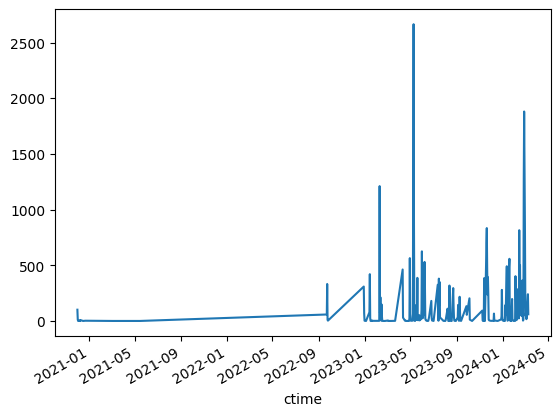

In [44]:
tmp = df_submissions.groupby('ctime').count()
tmp['cid'].plot()

## Tokenization and Preprocess

In [36]:
for post in posts: 
    for comment in post['comments']:
        print(comment.keys())
        print(comment['body'])        
        print(type(comment['body']))
        print(len(comment['body'].split()))

dict_keys(['cid', 'clink_id_t', 'clink_id_pid', 'ctime', 'cbody', 'cdistinguished', 'cscore', 'cnum_replies', 'csubreddit_id_t', 'csubreddit_id_sid'])


KeyError: 'body'

## Feature Vectorization

Sentiment, Attetion and Divergence & Time-Series Feature

In [18]:
b = TextBlob('I love NLP.',analyzer=NaiveBayesAnalyzer())
(b.sentiment[i] for i in range(3))
# TextBlob().sentiment.classification
# TextBlob().sentiment.p_pos
# TextBlob().sentiment.p_neg
# b.polarity # how positive
b.subjectivity # how subjective


<generator object <genexpr> at 0x0000020E3DF0ACF0>

0.5

0.6

In [15]:
b.sentiment[0]

'pos'